# MBS Market Study and Default Prediction


## Environment Setup

In [1]:
# Import necessary packages
import os
import pandas as pd
import numpy as np 
import re
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, kruskal

## Import Datasets

### Import eMaxx Dataset

In [2]:
# # Parse all raw data into python
# main_folder_path = os.path.expanduser('/Users/miracles/Desktop/practicum/Raw Data') 
# subfolders = [f for f in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, f))]

# # Dictionary to hold data
# data = {}

# # Wrap your main loop with tqdm to display the progress bar
# for subfolder in tqdm(subfolders, desc="Processing folders"):
#     # Extract year/quarter from the folder name using regex
#     match = re.search(r'(\d{4}Q\d)', subfolder)
#     if match:
#         year_quarter = match.group(1)
        
#         subfolder_path = os.path.join(main_folder_path, subfolder)
        
#         # List all txt files in the current subfolder
#         all_files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f)) and f.endswith('.txt')]
        
#         # Read each TXT file into its DataFrame and store in a dictionary
#         dataframes = {file[:-4]: pd.read_csv(os.path.join(subfolder_path, file), delimiter='|', low_memory=False) for file in all_files}
        
#         data[year_quarter] = dataframes

In [3]:
# # Define a mapping of market types to their respective names
# market_type_mapping = {
#     'C': 'Corporate',
#     'A': 'Asset Backed',
#     'M': 'Mortgage',
#     'G': 'Government',
#     'R': 'Regional'
# }

# # Apply the mapping to the 'MARKET' column to create the new column
# for year, dfs in data.items():
#     dfs['SECMAST']['MARKET_TYPE'] = dfs['SECMAST']['MARKET'].map(market_type_mapping)

In [4]:
# # Step 0: Remove outliers based on the summed 'PARAMT' by 'MARKET_TYPE'
# for year, df in data.items():
#     market_sums = df['SECMAST'].groupby('MARKET_TYPE')['PARAMT'].sum()
#     Q1 = market_sums.quantile(0.25)
#     Q3 = market_sums.quantile(0.75)
#     IQR = Q3 - Q1
#     valid_market_types = market_sums[(market_sums >= Q1 - 1.5 * IQR) & (market_sums <= Q3 + 1.5 * IQR)].index
#     df['SECMAST'] = df['SECMAST'][df['SECMAST']['MARKET_TYPE'].isin(valid_market_types)]

# # Step 1: Aggregate Data by Market Type
# market_sums_over_years = {}

# for year, df in data.items():
#     # Group by 'MARKET' and sum 'PARAMT' for each group
#     market_sums = df['SECMAST'].groupby('MARKET_TYPE')['PARAMT'].sum()
#     market_sums_over_years[year] = market_sums

# # Step 2: Prepare Data for Plotting
# # Convert the nested dictionary to a DataFrame
# df_market_sums = pd.DataFrame(market_sums_over_years).T.fillna(0)

# # Sort the DataFrame by index (year/quarter) for orderly plotting
# df_market_sums = df_market_sums.sort_index()

# # Step 3: Plot Stacked Bar Chart
# ax = df_market_sums.plot(kind='bar', stacked=True, figsize=(18, 9), colormap='tab10', width=0.8)

# # Set labels, title, and legend
# ax.set_xlabel('Year/Quarter', fontsize=14, labelpad=10)
# ax.set_ylabel('Sum of PARAMT', fontsize=14, labelpad=10)
# ax.set_title('Sum of PARAMT by Market Type Over Years/Quarters', fontsize=16, pad=10)

# # Set x-tick labels: Rotate and show only every nth label to avoid clutter
# n = 4  # Change n to control the number of labels displayed
# [lab.set_visible(False) for (i,lab) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

# plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
# plt.yticks(fontsize=12)  # Adjust y-tick font size

# # Adjust legend
# plt.legend(title='Market Type', title_fontsize='13', fontsize='11')

# # Set grid and layout
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.tight_layout()

# # Show the plot
# plt.show()

In [5]:
# # Filtering data for MBS only
# mbs_data = {year: {'SECMAST': df['SECMAST'][df['SECMAST']['MARKET'] == 'M']} for year, df in data.items()}

# # Sort the data by its keys (years/quarters)
# sorted_data = dict(sorted(mbs_data.items()))

# # Extract sums for each year/quarter and exclude the specific quarters
# exclude_quarters = []  # Add the quarters you want to exclude
# sums_over_years = {year: df['SECMAST']['PARAMT'].sum() for year, df in sorted_data.items() if year not in exclude_quarters}

# # Splitting the keys (years/quarters) and values (sums)
# years_quarters = list(sums_over_years.keys())
# sum_values = list(sums_over_years.values())

# # Plotting
# plt.figure(figsize=(14, 7))
# plt.plot(years_quarters, sum_values, marker='o', linestyle='-')
# plt.xlabel('Year/Quarter', fontsize=14)
# plt.ylabel('Sum of PARAMT', fontsize=14)
# plt.title('Sum of PARAMT Over Years/Quarters', fontsize=16)
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.xticks(years_quarters[::4], rotation=45, fontsize=12)
# plt.yticks(fontsize=12)
# plt.tight_layout()
# plt.show()


In [6]:
# import ipywidgets as widgets
# import matplotlib.pyplot as plt
# from IPython.display import display

# # Assuming df_market_sums is your prepared DataFrame

# # Function to plot pie chart for selected quarter
# def plot_pie_chart(quarter):
#     plt.figure(figsize=(8,8))
    
#     # Get data for selected quarter
#     data = df_market_sums.loc[quarter]
    
#     # Create pie chart
#     plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
#     plt.title(f'Distribution of PARAMT for {quarter}')
#     plt.show()

# # Create dropdown widget for quarter selection
# quarter_dropdown = widgets.Dropdown(
#     options=df_market_sums.index,  # List of quarters
#     value=df_market_sums.index[0],  # Default value
#     description='Select Quarter:',  # Label for dropdown
# )

# # Link widget to plotting function
# widgets.interactive(plot_pie_chart, quarter=quarter_dropdown)


In [7]:
# # Sort the data by its keys (years/quarters)
# sorted_data = dict(sorted(data.items()))

# # Extract sums for each year/quarter
# sums_over_years = {year: df['SECMAST']['ISSUERCUS'].count() for year, df in sorted_data.items()}

# # Splitting the keys (years/quarters) and values (sums)
# years_quarters = list(sums_over_years.keys())
# sum_values = list(sums_over_years.values())

# # Plotting
# plt.figure(figsize=(14, 7))

# # Plot data
# plt.plot(years_quarters, sum_values, marker='o', linestyle='-')

# # Setting labels, titles, and grid
# plt.xlabel('Year/Quarter', fontsize=14)
# plt.ylabel('Count of PARAMT', fontsize=14)
# plt.title('Count of PARAMT Over Years/Quarters', fontsize=16)
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# # Adjust x-ticks: Display only every 4th quarter (i.e., once a year)
# plt.xticks(years_quarters[::4], rotation=45, fontsize=12)

# # Adjust y-tick font size
# plt.yticks(fontsize=12)

# # Ensure layout is tight for better presentation
# plt.tight_layout()

# # Display the plot
# plt.show()

### Import SIFMA dataset

#### Outstanding Volume Sheet

In [8]:
df_sifma_out = pd.read_excel('/Users/miracles/Desktop/practicum/Reference data/US-Fixed-Income-Securities-Statistics-SIFMA copy.xlsx', sheet_name='Outstanding')
new_columns = df_sifma_out.iloc[6]
df_sifma_out.columns = new_columns
df_sifma_out = df_sifma_out.iloc[7:18]
df_sifma_out = df_sifma_out.rename(columns={np.nan: 'Year'}).reset_index(drop = True)

for col in df_sifma_out.columns:
    if col != 'Year': 
        df_sifma_out[col] = pd.to_numeric(df_sifma_out[col], errors='coerce', downcast='float')
        
if df_sifma_out['Year'].isnull().any():
    print("Warning: Missing values found in 'year' column. Please handle them before converting to integer.")
else:
    df_sifma_out['Year'] = df_sifma_out['Year'].astype(int)
df_sifma_out = df_sifma_out.iloc[0:10]
df_sifma_out

6,Year,UST,MBS,Corporates,Munis,Agency,ABS,MMs,Total
0,2012,11046.091,8838.069336,6713.976074,3947.740967,2095.811279,1280.341553,952.346497,34874.376543
1,2013,11854.435,8742.589844,7120.620117,3885.591064,2058.291748,1285.729858,951.631592,35898.889037
2,2014,12504.782,8841.997070,7464.520996,3849.458008,2028.749878,1349.380249,930.385864,36969.273797
3,2015,13191.555,8894.813477,7701.914062,3869.604980,1995.396240,1376.586792,941.492432,37971.362831
4,2016,13908.241,9023.211914,7954.687012,3918.702881,1971.692139,1391.760254,884.870239,39053.165604
5,2017,14468.781,9304.524414,8306.078125,3934.928955,1934.670776,1457.910156,965.932678,40372.826304
6,2018,15607.967,9732.330078,8508.314453,3889.708008,1841.577515,1615.628540,995.971375,42191.496198
7,2019,16673.327,10229.477539,8859.026367,3899.430908,1726.153687,1663.196167,1045.247559,44095.859305
8,2020,20973.129,11214.048828,9810.032227,3983.907959,1688.596313,1535.498901,986.896667,50192.109609
9,2021,22584.039,12201.627930,10058.426758,4069.431885,1433.292847,1585.251831,1014.169617,52946.240483


#### Market Size Sheet

In [9]:
df_sifma_market = pd.read_csv('/Users/miracles/Desktop/practicum/Reference data/Market Size.csv')
    
df_sifma_market

,period,Corporate Securities,Mortgage-Related Securities,Asset-Backed Securities,Federal Agency Securities,Treasury Securities,Money Markets,Municipal Securities,Outstanding (Total)
0,1996,2264.773,2606.428300,298.184500,785.484292,3444.691000,802.977,1261.631,11464.169092
1,1997,2474.749,2871.771100,394.852100,924.837831,3441.817000,979.423,1318.530,12405.980031
2,1998,2814.818,3243.377800,478.026500,1221.219139,3340.457000,1172.560,1402.728,13673.186439
3,1999,3158.932,3832.201700,583.465400,1534.856398,3265.983000,1402.444,1457.089,15234.971498
4,2000,3401.451,4119.309900,701.875100,1767.553183,2951.886000,1613.994,1480.713,16036.782183
5,2001,3811.129,4710.961300,812.014600,2031.451730,2968.000000,1473.993,1603.398,17410.947630
6,2002,3997.038,5289.394800,904.815500,2279.371064,3205.261000,1374.897,1762.821,18813.598364
7,2003,4345.330,5714.493200,995.327700,2475.835494,3575.182000,1292.938,1900.376,20299.482394
8,2004,4541.090,6301.689900,1100.244300,2656.546373,3945.781000,1399.127,2880.952,22825.430573
9,2005,4604.160,7218.077100,1281.395300,2561.201302,4169.959000,1644.201,3104.246,24583.239702


#### Issuance Volume Sheet

In [10]:
df_sifma_issu = pd.read_csv('/Users/miracles/Desktop/practicum/Reference data/Fixed Income New Insurance.csv')
    
df_sifma_issu

,period,Corporate Securities,Mortgage-Related Securities,Asset-Backed Securities,Federal Agency Securities,Treasury Securities,Municipal Securities,Issuance (Total)
0,1996,357.8802,551.692943,121.159294,277.900000,652.722222,182.8986,2144.253259
1,1997,480.9082,723.585800,143.096732,323.100000,565.245556,218.6194,2454.555688
2,1998,605.9284,1255.612079,184.165753,596.400000,485.641135,284.0955,3411.842867
3,1999,628.4258,1119.089910,196.293670,548.000000,416.138310,224.6431,3132.590790
4,2000,626.1082,779.884396,240.273232,446.600000,312.584918,198.2384,2603.689146
5,2001,857.1114,1816.777820,261.399636,941.000000,380.635633,286.4965,4543.420989
6,2002,669.4663,2515.616695,268.569772,1041.500000,572.187704,356.6163,5423.956770
7,2003,855.9666,3536.917291,287.572854,1219.472508,745.155611,380.2896,7025.374464
8,2004,813.3936,2428.318839,330.575547,877.775213,853.375723,358.0995,5661.538421
9,2005,783.7544,2764.171616,473.714063,635.012132,746.100637,407.1368,5809.889648


#### Trading Volume Sheet

In [11]:
df_sifma_trade = pd.read_excel('/Users/miracles/Desktop/practicum/Reference data/US-Fixed-Income-Securities-Statistics-SIFMA copy.xlsx', sheet_name='Trading Volume')
new_columns = df_sifma_trade.iloc[6]
df_sifma_trade.columns = new_columns
df_sifma_trade = df_sifma_trade.iloc[7:18]
df_sifma_trade = df_sifma_trade.rename(columns={np.nan: 'Year'}).reset_index(drop = True)
df_sifma_trade = df_sifma_trade[['Year', 'UST', 'Agency MBS', 'Non-Agency MBS', 'Corporates', 'Munis', 'Agency', 'ABS', 'Total']]
for col in df_sifma_trade.columns:
    if col != 'Year': 
        df_sifma_trade[col] = pd.to_numeric(df_sifma_trade[col], errors='coerce', downcast='float')
        
if df_sifma_trade['Year'].isnull().any():
    print("Warning: Missing values found in 'year' column. Please handle them before converting to integer.")
else:
    df_sifma_trade['Year'] = df_sifma_trade['Year'].astype(int)
    
df_sifma_trade

6,Year,UST,Agency MBS,Non-Agency MBS,Corporates,Munis,Agency,ABS,Total
0,2012,519.498474,279.845367,4.566849,22.615213,11.261010,10.699857,1.529351,850.016113
1,2013,546.516663,221.812820,4.041480,24.697897,11.175880,7.289269,1.288576,816.822571
2,2014,505.019989,177.403641,3.679844,26.686193,9.872500,6.046269,1.506111,730.214539
3,2015,490.029999,192.262344,3.067142,27.939812,8.615410,5.249142,1.439268,728.603149
4,2016,519.099976,209.483734,2.785053,30.020126,11.058230,5.404153,1.330264,779.181580
5,2017,505.160004,208.734879,2.297960,30.937258,10.759810,4.152195,1.416964,763.459045
6,2018,547.799988,218.958847,1.606868,31.528740,11.609750,3.490368,1.423158,816.417725
7,2019,593.587036,248.964157,1.430860,34.256821,11.495930,4.163083,1.530379,895.428284
8,2020,603.181763,291.122955,1.881748,38.949009,11.981840,5.340173,1.885501,954.342957
9,2021,624.064941,279.313263,1.379629,36.989937,8.822000,3.227512,1.386735,955.184021


### Import US GDP data 

In [12]:
df_gdp = pd.read_csv('/Users/miracles/Desktop/practicum/Reference data/GDP.csv')
df_gdp 

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
301,2022-04-01,25544.273
302,2022-07-01,25994.639
303,2022-10-01,26408.405
304,2023-01-01,26813.601


### Import US GDP-based Recession data

In [13]:
df_recession = pd.read_csv('/Users/miracles/Desktop/practicum/Reference data/GDP-based Recession index.csv')
df_recession 

,DATE,JHGDPBRINDX
0,1967-10-01,3.8348
1,1968-01-01,1.7614
2,1968-04-01,1.2127
3,1968-07-01,2.3009
4,1968-10-01,6.3338
...,...,...
217,2022-01-01,37.4000
218,2022-04-01,29.2000
219,2022-07-01,8.3000
220,2022-10-01,7.6000


### Import CPI data

In [14]:
df_cpi = pd.read_csv('/Users/miracles/Desktop/practicum/Reference data/cpi.csv')
df_cpi 

,DATE,CORESTICKM159SFRBATL
0,1967-12-01,3.383497
1,1968-01-01,3.659987
2,1968-02-01,3.682012
3,1968-03-01,4.151668
4,1968-04-01,4.165427
...,...,...
664,2023-04-01,6.322749
665,2023-05-01,6.000606
666,2023-06-01,5.626529
667,2023-07-01,5.456089


### Import Yield Curve Data

In [15]:
df_YC = pd.read_csv('/Users/miracles/Desktop/practicum/Reference data/Yield Curve.csv')
df_YC

,DATE,T10Y2Y
0,2018-10-02,0.23
1,2018-10-03,0.3
2,2018-10-04,0.32
3,2018-10-05,0.35
4,2018-10-08,.
...,...,...
1300,2023-09-26,-0.48
1301,2023-09-27,-0.49
1302,2023-09-28,-0.45
1303,2023-09-29,-0.44


### Import Housing price data

In [16]:
df_housing_price = pd.read_csv('/Users/miracles/Desktop/practicum/Reference data/fmhpi_master_file.csv')
df_housing_price 

,Year,Month,GEO_Type,GEO_Name,GEO_Code,Index_NSA,Index_SA
0,1975,1,State,AK,.,34.332844,34.534399
1,1975,2,State,AK,.,34.896796,35.063040
2,1975,3,State,AK,.,35.472741,35.520850
3,1975,4,State,AK,.,36.065779,35.957562
4,1975,5,State,AK,.,36.707256,36.418835
...,...,...,...,...,...,...,...
254619,2023,4,CBSA,Yuma AZ,49740,265.541309,263.763348
254620,2023,5,CBSA,Yuma AZ,49740,269.265234,266.508275
254621,2023,6,CBSA,Yuma AZ,49740,272.605000,268.852882
254622,2023,7,CBSA,Yuma AZ,49740,276.140017,271.406851


### Import Unemployment Rate data - all us

In [17]:
df_unemployment = pd.read_csv('/Users/miracles/Desktop/practicum/Reference data/US total UNRATE.csv')
df_unemployment

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
904,2023-05-01,3.7
905,2023-06-01,3.6
906,2023-07-01,3.5
907,2023-08-01,3.8


### Import Unemployment Rate data - by state

In [18]:
df_unemployment_state = pd.read_excel('/Users/miracles/Desktop/practicum/Reference data/ststdsadata.xlsx')
df_unemployment_state

,FIPS Code,State and area,Year,Month,Population,Total,Percent of population,Total Employment,Percent of Employment,Total Unemployed,Percent of Unemployment
0,1,Alabama,1976,1,2605000,1484555,57.0,1386023,53.2,98532,6.6
1,2,Alaska,1976,1,232000,160183,69.0,148820,64.1,11363,7.1
2,4,Arizona,1976,1,1621000,964120,59.5,865871,53.4,98249,10.2
3,5,Arkansas,1976,1,1536000,889044,57.9,824395,53.7,64649,7.3
4,6,California,1976,1,15621000,9774280,62.6,8875685,56.8,898595,9.2
...,...,...,...,...,...,...,...,...,...,...,...
30311,51,Virginia,2023,8,6894942,4601469,66.7,4488510,65.1,112959,2.5
30312,53,Washington,2023,8,6295072,4067293,64.6,3921175,62.3,146118,3.6
30313,54,West Virginia,2023,8,1433076,786432,54.9,758168,52.9,28264,3.6
30314,55,Wisconsin,2023,8,4770543,3133452,65.7,3043965,63.8,89487,2.9


# Data Visualization

# Market Analysis

## Market size - Total

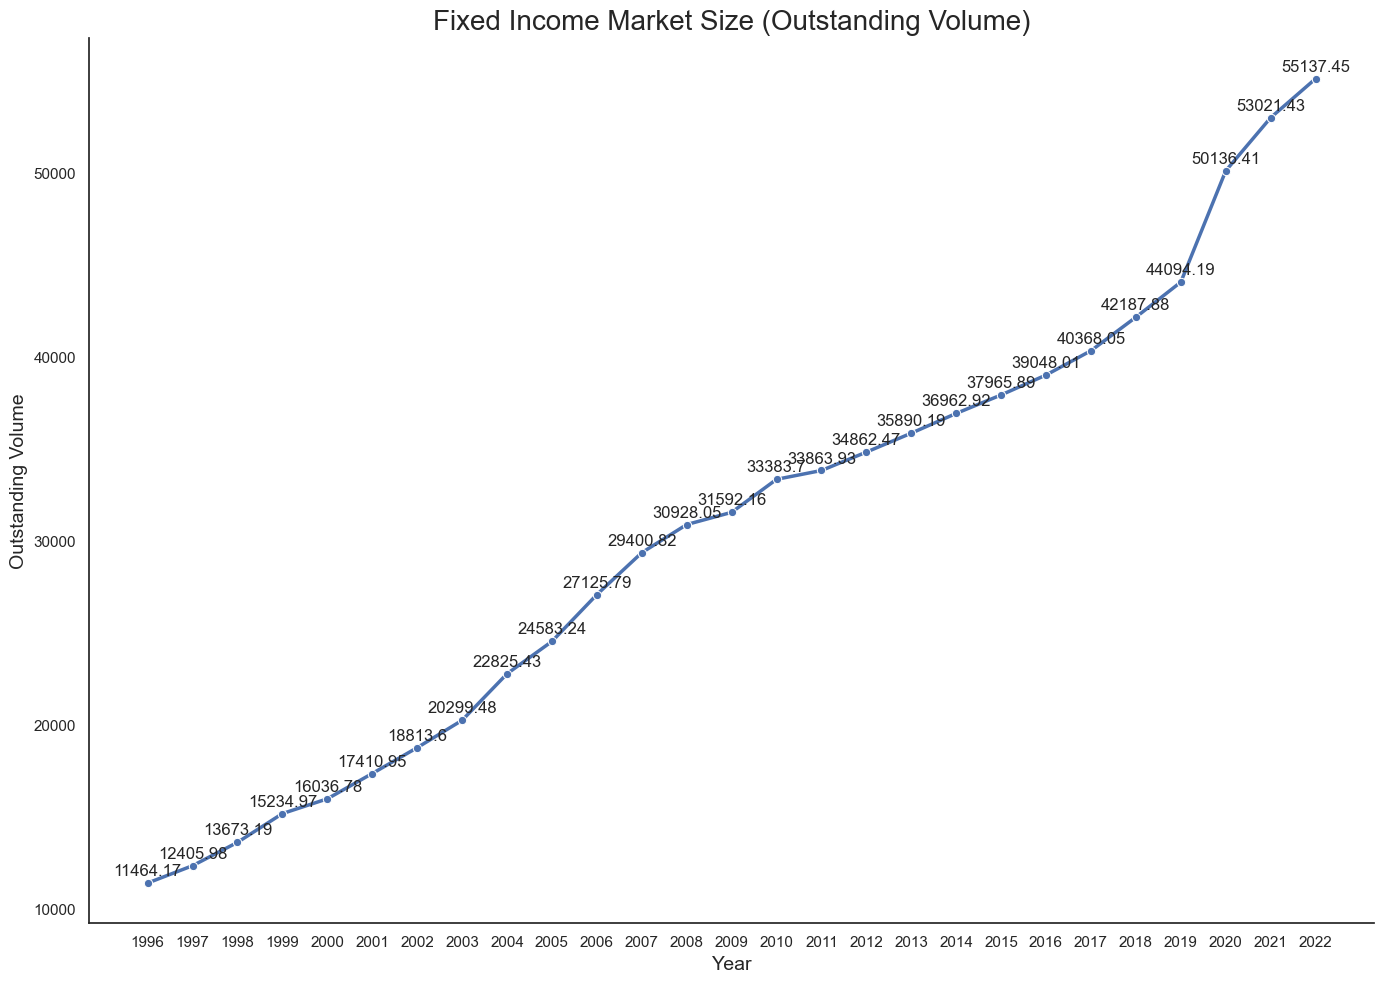

In [19]:
# Set the style of the visualization
sns.set(style="white")

# Create a color palette
palette = sns.color_palette("husl", 1)

# Set the figure size
plt.figure(figsize=(14, 10))

# Draw line plot with Seaborn and get the Axes object
ax = sns.lineplot(x='period', y='Outstanding (Total)', data=df_sifma_market, palette=palette, linewidth=2.5, marker='o')

# Add title and labels
ax.set_title('Fixed Income Market Size (Outstanding Volume)', fontsize=20)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Outstanding Volume', fontsize=14)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate each data point with its value
for index, row in df_sifma_market.iterrows():
    ax.annotate(f"{round(row['Outstanding (Total)'],2)}", (row['period'], row['Outstanding (Total)']), textcoords="offset points", xytext=(0,5), ha='center')

# Set x-tickers to display all years
ax.set_xticks(df_sifma_market['period'].unique())  # Set x-ticks to match all dates in your DataFrame

# Show the plot
plt.tight_layout()
plt.show()


## Market Size - Aggregated by Fixed Income types - Stacked Area Chart

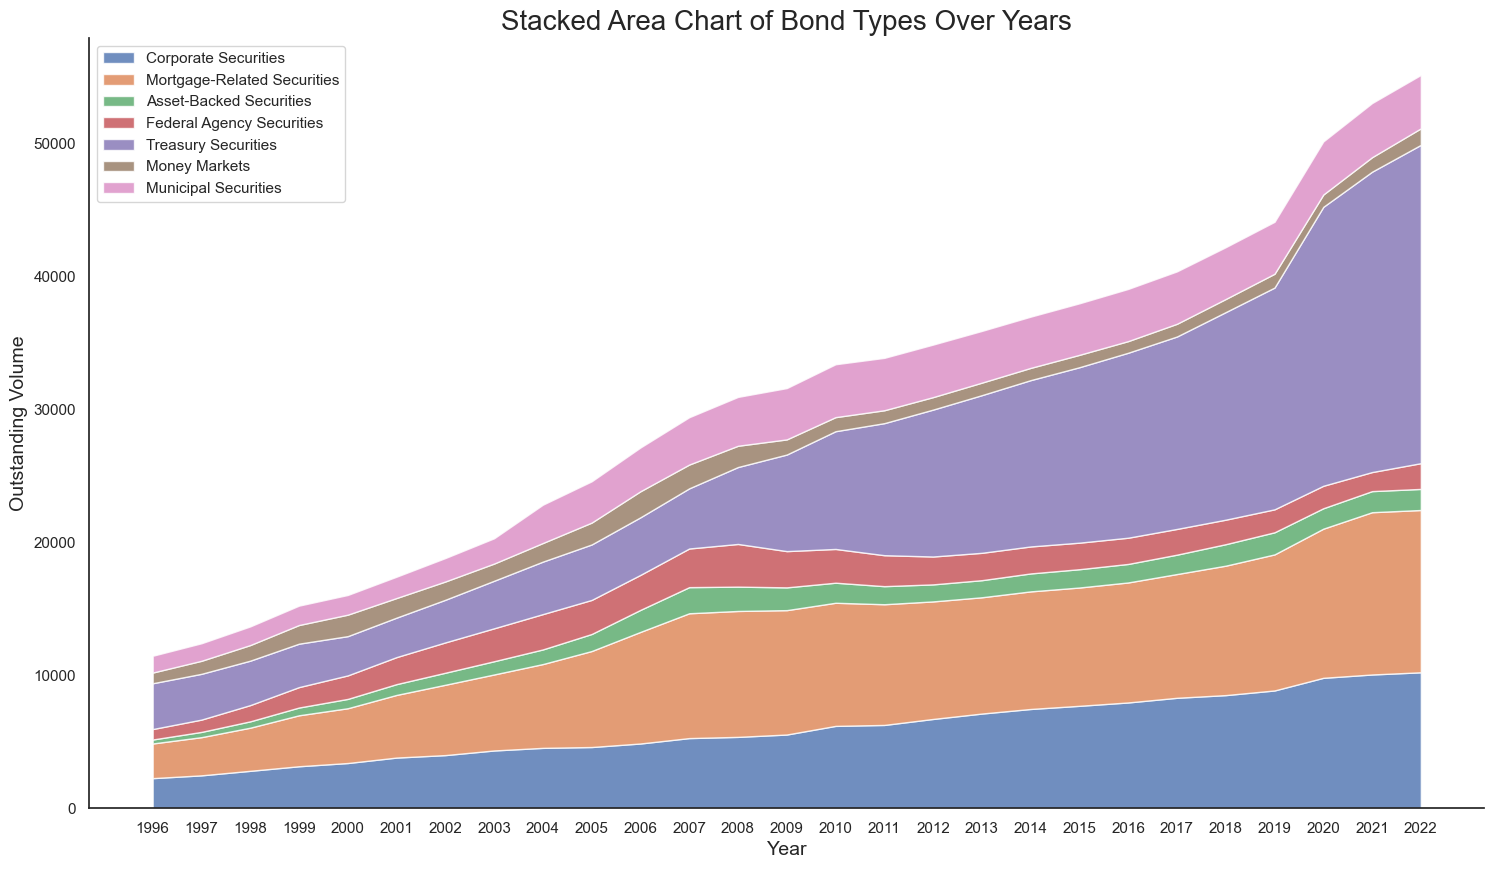

In [20]:
# Set the figure size
plt.figure(figsize=(18, 10))

# List of columns (excluding 'Year' and 'Total') to be used for the stacked area chart
columns = ['Corporate Securities', 'Mortgage-Related Securities',
       'Asset-Backed Securities', 'Federal Agency Securities',
       'Treasury Securities', 'Money Markets', 'Municipal Securities']

# Plot stacked area chart
plt.stackplot(df_sifma_market['period'], *[df_sifma_market[col] for col in columns], labels=columns, alpha=0.8)

# Add title and labels
plt.title('Stacked Area Chart of Bond Types Over Years', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Outstanding Volume', fontsize=14)

# Add legend
plt.legend(loc='upper left')

# Remove top and right spines
ax = plt.gca()  # Get the current Axes instance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-tickers to display all years
ax.set_xticks(df_sifma_market['period'])  # Set x-ticks to match all years in your DataFrame


# Show the plot
plt.show()

## Market Size - Aggregated by Fixed Income types - Stacked Bar Chart

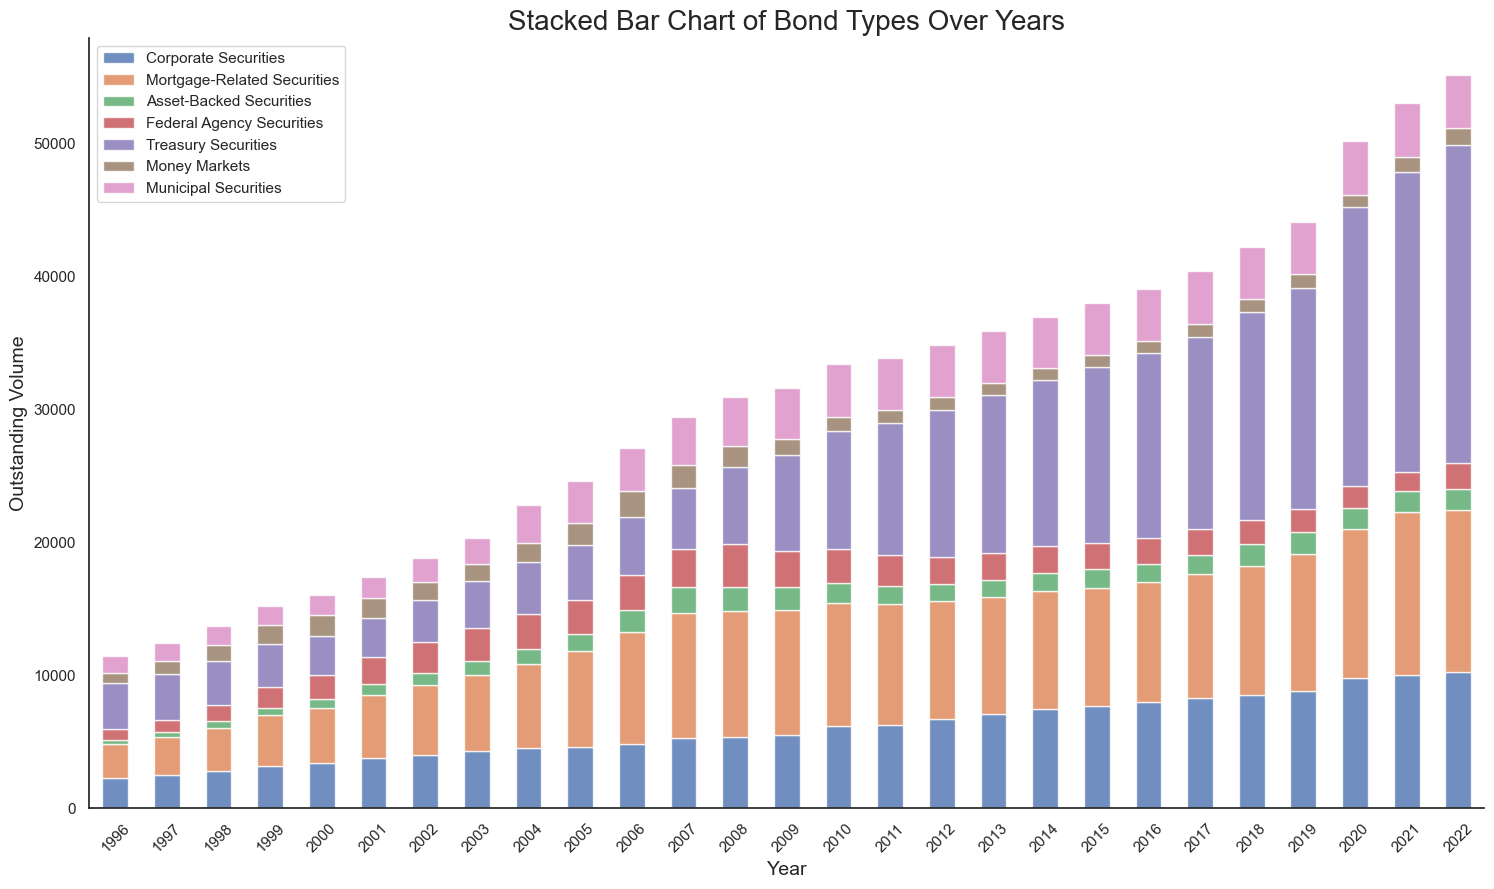

In [21]:
# Set the figure size
plt.figure(figsize=(18, 10))

# List of columns (excluding 'Year' and 'Total') to be used for the stacked area chart
columns = ['Corporate Securities', 'Mortgage-Related Securities',
       'Asset-Backed Securities', 'Federal Agency Securities',
       'Treasury Securities', 'Money Markets', 'Municipal Securities']

# Plot stacked bar chart
df_sifma_market.set_index('period')[columns].plot(kind='bar', stacked=True, figsize=(18, 10), alpha=0.8, ax=plt.gca())

# Add title and labels
plt.title('Stacked Bar Chart of Bond Types Over Years', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Outstanding Volume', fontsize=14)

# Add legend
plt.legend(loc='upper left')

# Remove top and right spines
ax = plt.gca()  # Get the current Axes instance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-tickers to display all years
ax.set_xticks(range(len(df_sifma_market['period'])))  # Set x-ticks to match all years in your DataFrame
ax.set_xticklabels(df_sifma_market['period'], rotation=45)  # Set x-tick labels with rotation for better visibility

# Show the plot
plt.show()


## Growth Rate - Aggregated by Fixed Income types - Line Plot

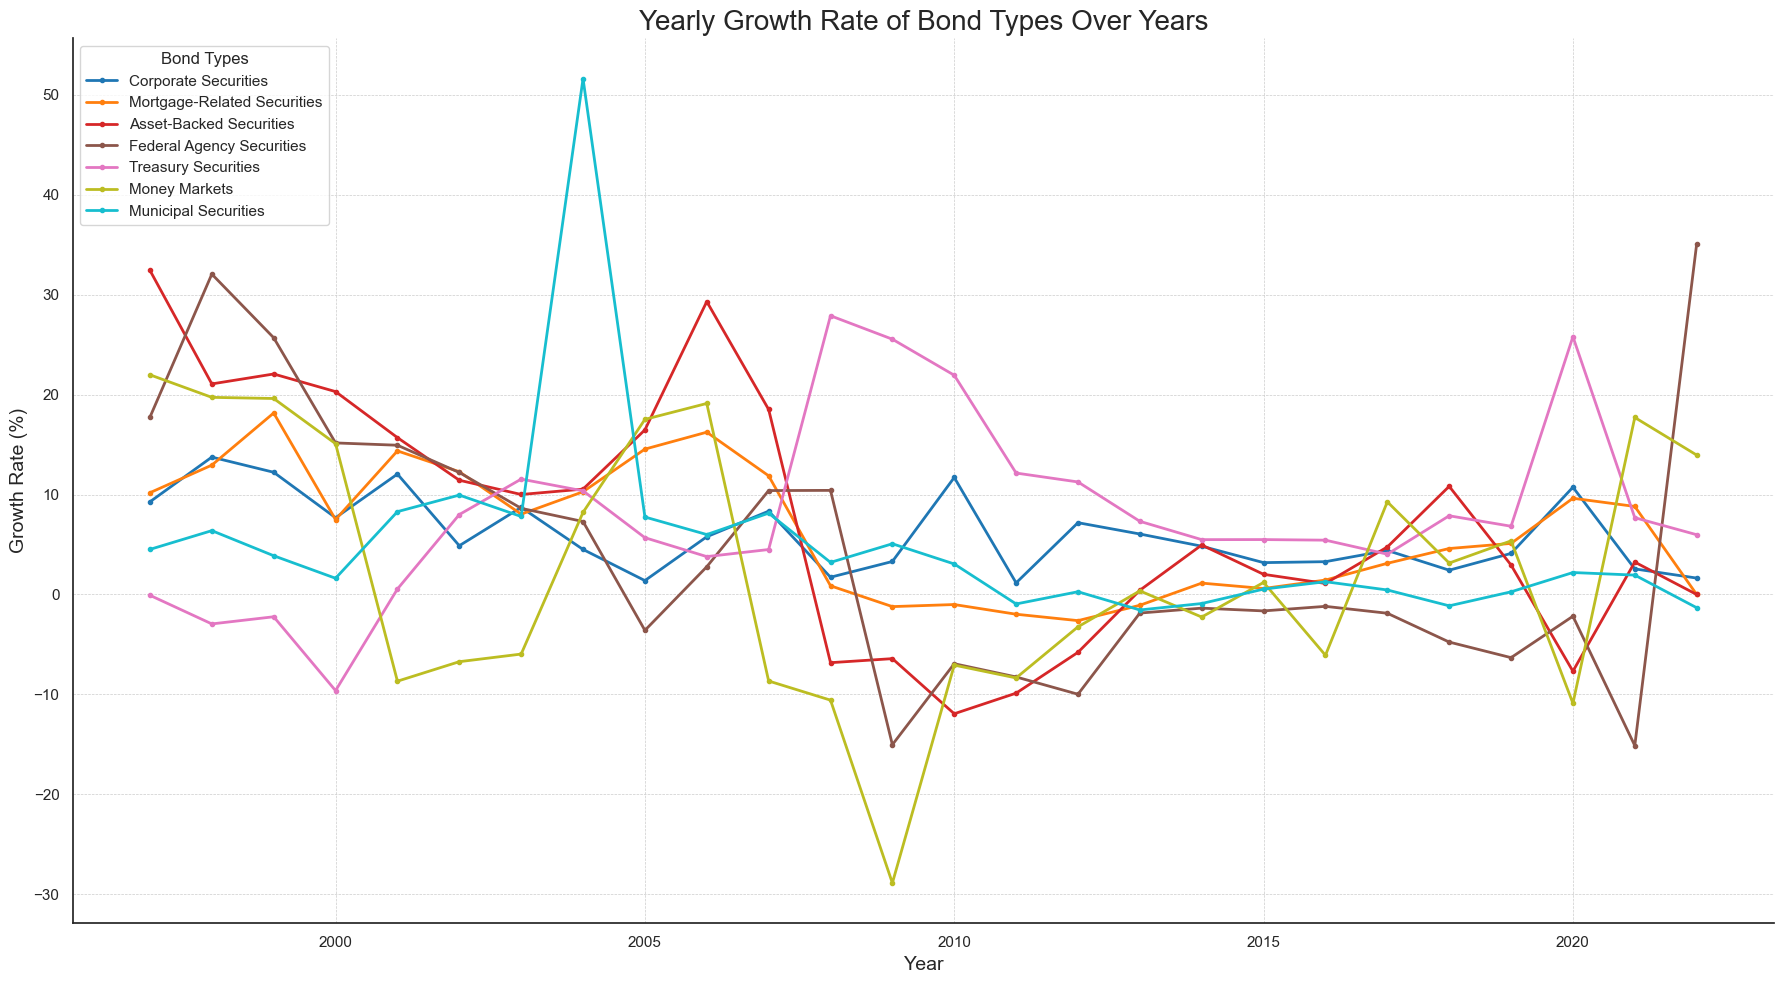

In [22]:
# Set the figure size
plt.figure(figsize=(18, 10))

# Calculate year-on-year growth rates
df_growth_rates = df_sifma_market.set_index('period')[columns].pct_change() * 100  # Convert to percentage

# Plot line chart for growth rates
ax = df_growth_rates.plot(linewidth=2, marker='o', markersize=3, ax=plt.gca(), colormap='tab10')

# Add title and labels
ax.set_title('Yearly Growth Rate of Bond Types Over Years', fontsize=20)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Growth Rate (%)', fontsize=14)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend
ax.legend(loc='upper left', title="Bond Types")

# Grid lines for better clarity
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


## Growth Rate - Aggregated by Fixed Income types - Separate Line Plots & Bar Charts

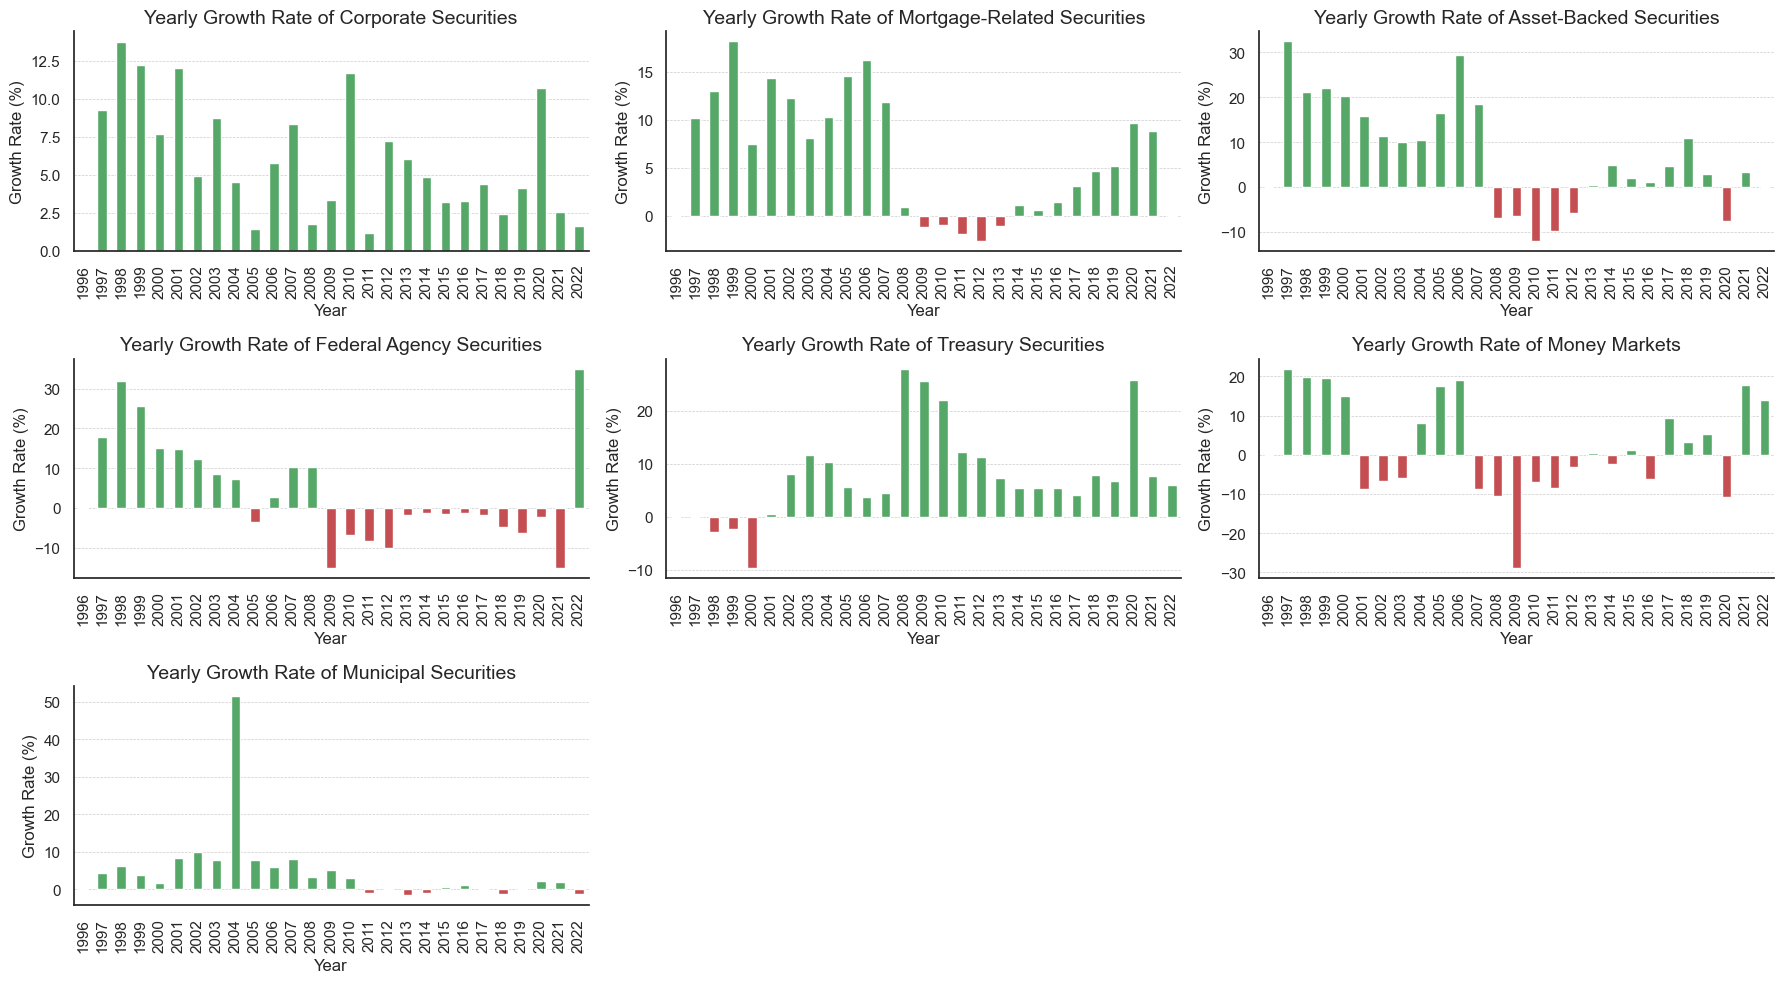

In [23]:
# Ensure dataframe is sorted by year/period
df_sifma_market = df_sifma_market.sort_values(by='period')

# Calculate year-on-year growth rates
df_growth_rates = df_sifma_market.set_index('period')[columns].pct_change() * 100  # Convert to percentage

# Set the figure size
plt.figure(figsize=(18, 10))

# Plot each bond type as a separate subplot
for i, col in enumerate(columns):
    ax = plt.subplot(3, 3, i+1)
    
    # Determine colors for each bar based on positive or negative growth rate
    colors = ['g' if val > 0 else 'r' for val in df_growth_rates[col]]
    
    # Bar plot
    df_growth_rates[col].plot(kind='bar', ax=ax, color=colors)
    
    # Set title and labels
    ax.set_title(f'Yearly Growth Rate of {col}', fontsize=14)
    ax.set_ylabel('Growth Rate (%)')
    ax.set_xlabel('Year')
    
    # Grid lines for better clarity
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

## Correlation Heatmap - Fixed Income Market - Aggregated by Bond Types

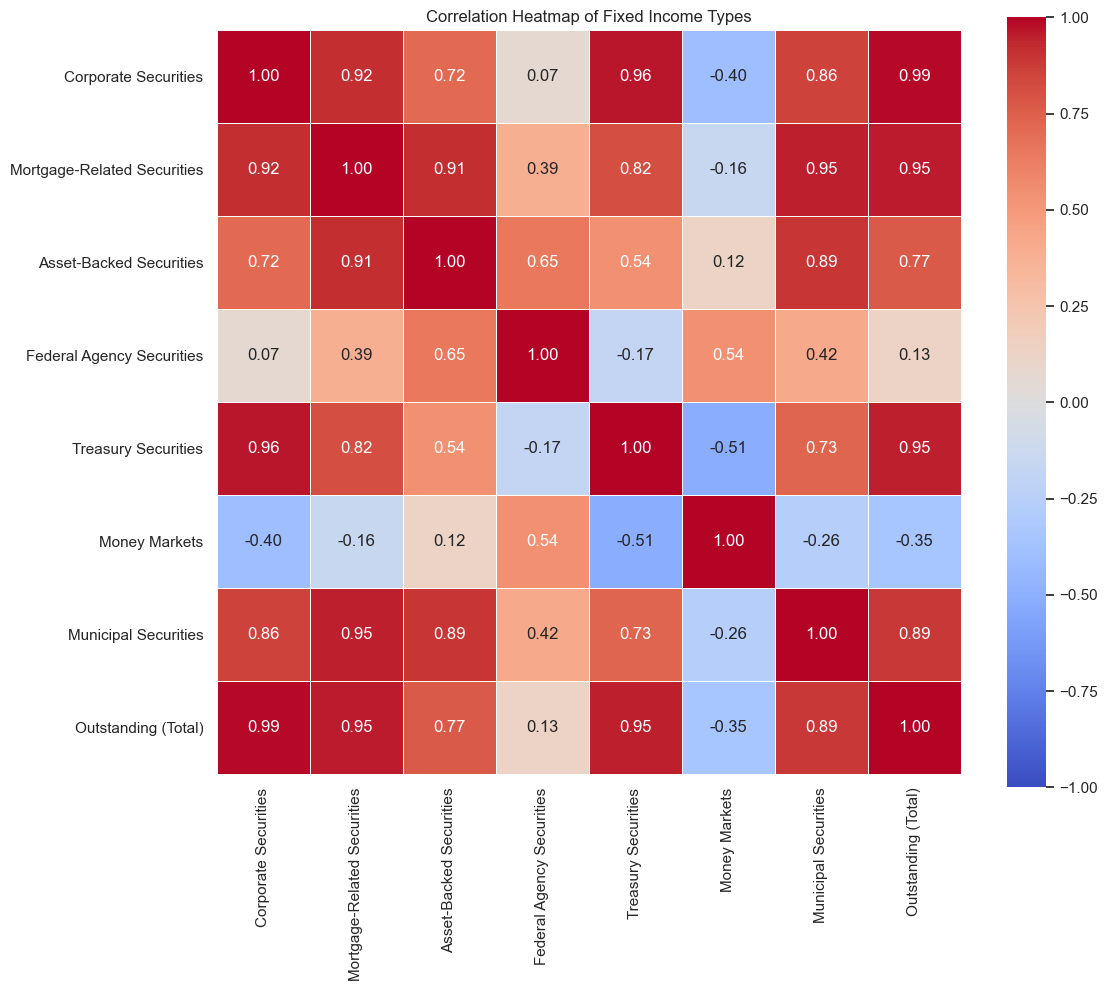

In [24]:
# Calculate correlation matrix
corr_matrix = df_sifma_market.drop(columns=['period']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=.5)

# Set plot title
plt.title('Correlation Heatmap of Fixed Income Types')

# Show the plot
plt.show()

## New Issurance - Total - Line Plot

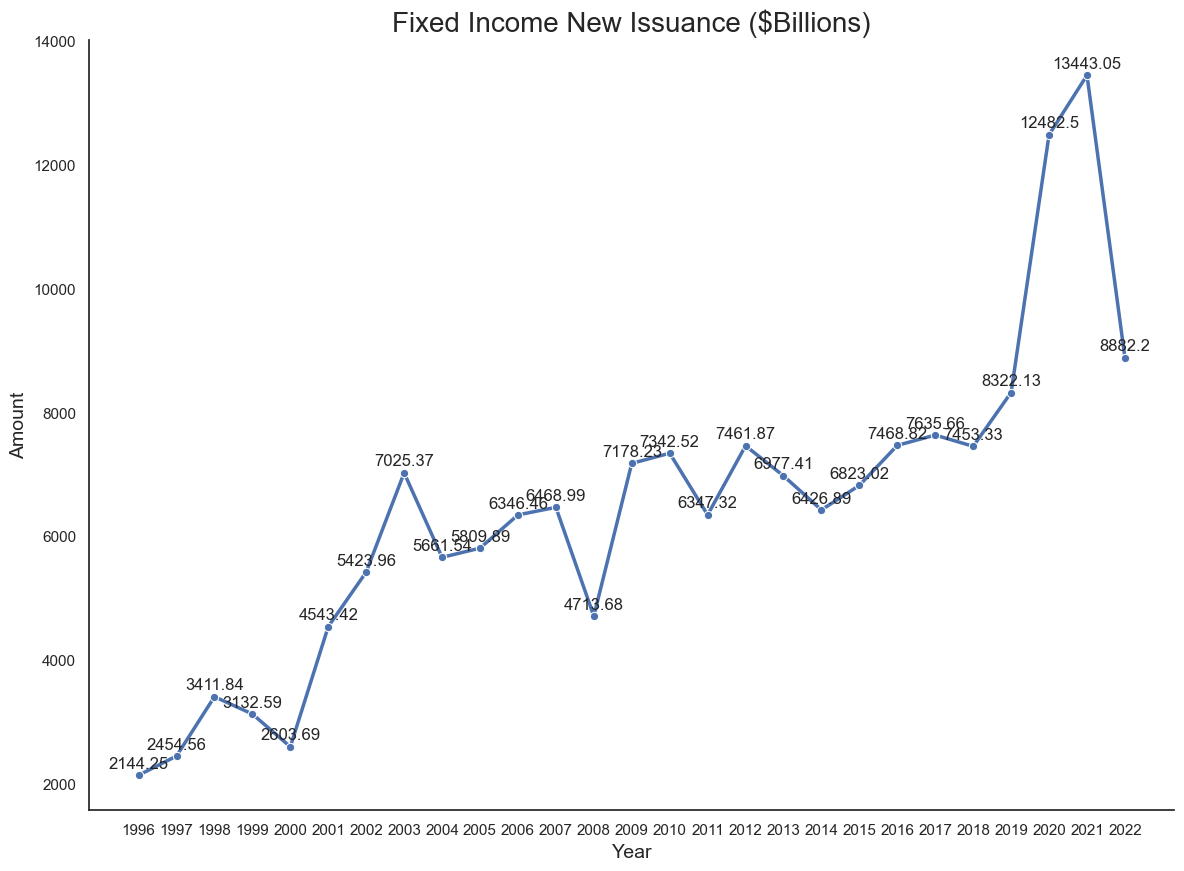

In [25]:
# Set the style of the visualization
sns.set(style="white")

# Create a color palette
palette = sns.color_palette("husl", 1)

# Draw line plot with Seaborn
plt.figure(figsize=(14, 10))
sns.lineplot(x='period', y='Issuance (Total)', data=df_sifma_issu, palette=palette, linewidth=2.5, marker='o')

# Add title and labels
plt.title('Fixed Income New Issuance ($Billions)', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)

# Remove top and right spines
ax = plt.gca()  # Get the current Axes instance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate each data point with its value
for index, row in df_sifma_issu.iterrows():
    ax.annotate(f"{round(row['Issuance (Total)'],2)}", (row['period'], row['Issuance (Total)']), textcoords="offset points", xytext=(0,5), ha='center')

# Show the plot

# Set x-tickers to display all years
ax.set_xticks(df_sifma_issu['period'])  # Set x-ticks to match all dates in your DataFrame

# Show the plot
plt.show()

## New Issuance - Aggregation by Bond Types - Stacked Bar Chart

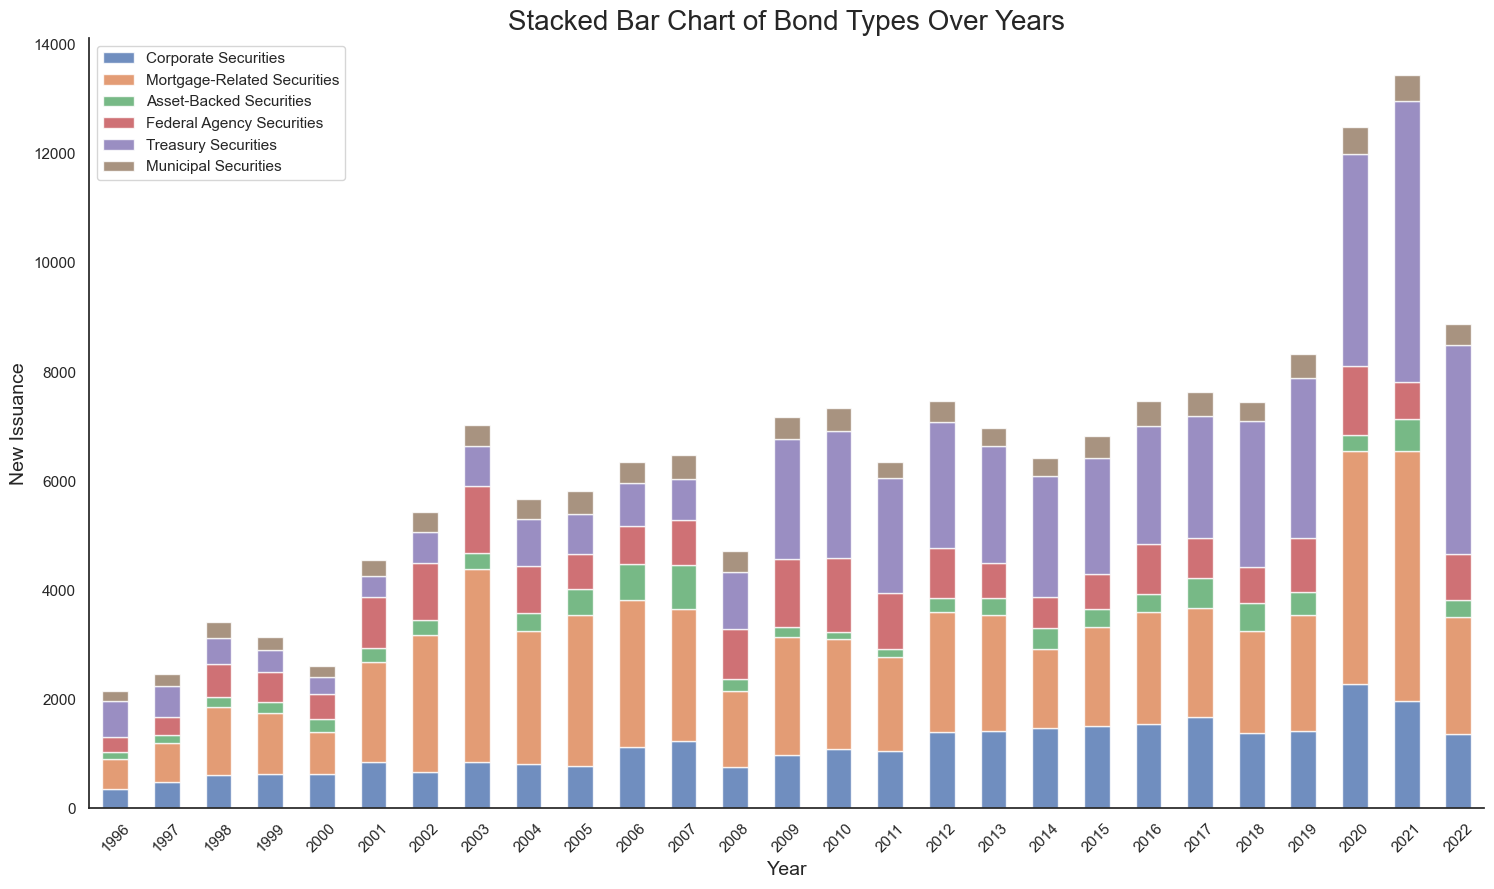

In [26]:
# Set the figure size
plt.figure(figsize=(18, 10))

# List of columns (excluding 'Year' and 'Total') to be used for the stacked bar chart
columns = ['Corporate Securities', 'Mortgage-Related Securities',
       'Asset-Backed Securities', 'Federal Agency Securities',
       'Treasury Securities', 'Municipal Securities']

# Plot stacked bar chart
df_sifma_issu.set_index('period')[columns].plot(kind='bar', stacked=True, figsize=(18, 10), alpha=0.8, ax=plt.gca())

# Add title and labels
plt.title('Stacked Bar Chart of Bond Types Over Years', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('New Issuance', fontsize=14)

# Add legend
plt.legend(loc='upper left')

# Remove top and right spines
ax = plt.gca()  # Get the current Axes instance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-tickers to display all years
ax.set_xticks(range(len(df_sifma_issu['period'])))  # Set x-ticks to match all years in your DataFrame
ax.set_xticklabels(df_sifma_issu['period'], rotation=45)  # Set x-tick labels with rotation for better visibility

# Show the plot
plt.show()


## Issuance - Aggregation by Bond Types & Total - Line plot & Stacked Bar Chart

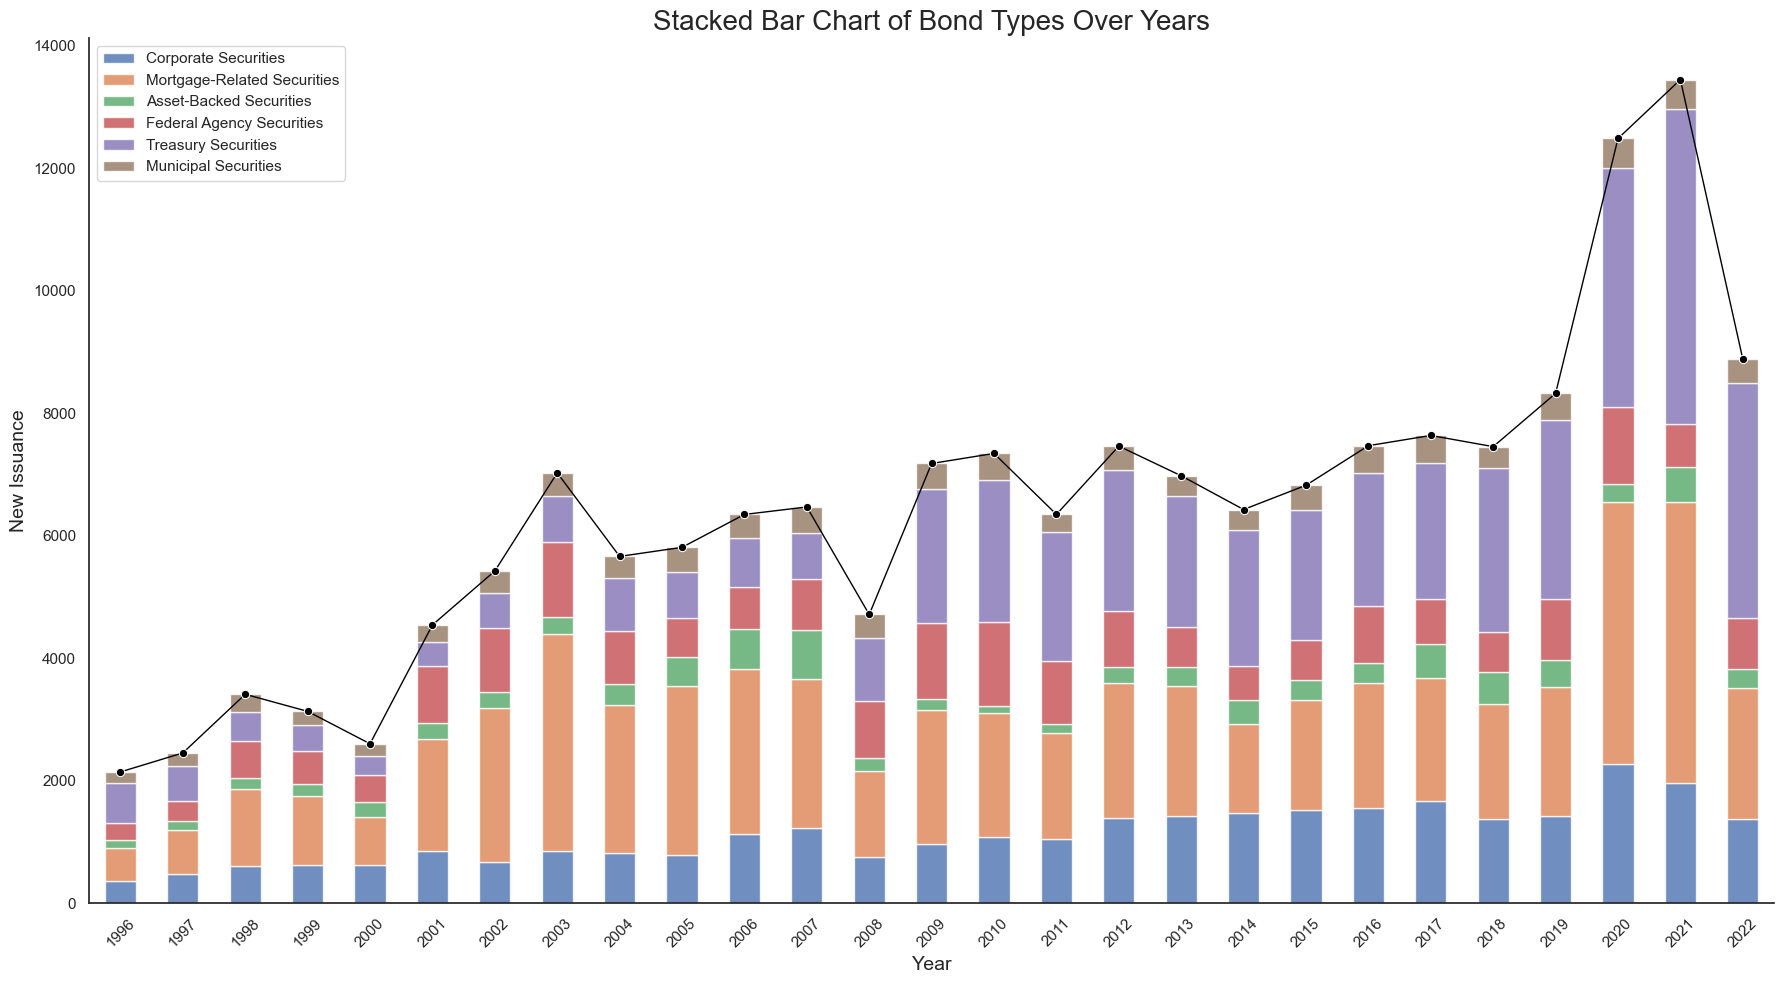

In [27]:
df_sifma_issu['Year_Str'] = df_sifma_issu['period'].astype(str)

# Set the figure size for combined plot
plt.figure(figsize=(18, 10))

# Plot stacked bar chart using 'Year_Str'
ax = plt.gca()  # Get the current Axes instance
df_sifma_issu.set_index('Year_Str')[columns].plot(kind='bar', stacked=True, alpha=0.8, ax=ax)

# Draw line plot with Seaborn using 'Year_Str'
sns.lineplot(x='Year_Str', y='Issuance (Total)', data=df_sifma_issu, color = 'black', linewidth=1, marker='o')

# Set x-tickers to display all years using 'Year_Str'
ax.set_xticks(range(len(df_sifma_issu['Year_Str'])))  # Set x-ticks to match all years in your DataFrame
ax.set_xticklabels(df_sifma_issu['Year_Str'], rotation=45)  # Set x-tick labels with rotation for better visibility
# Remove top and right spines

ax = plt.gca()  # Get the current Axes instance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add title and labels
plt.title('Stacked Bar Chart of Bond Types Over Years', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('New Issuance', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Average Daily Trading Volume - Total - Line Plot

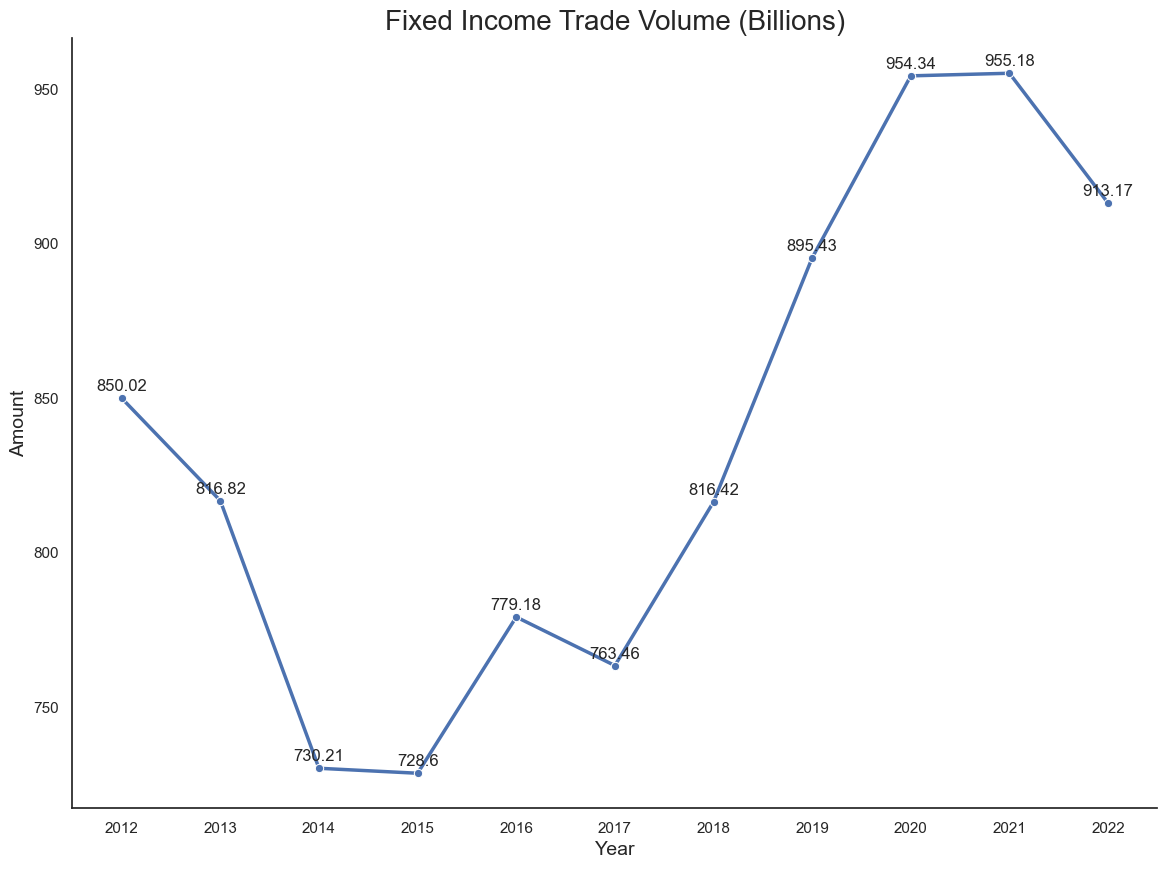

In [28]:
# Set the style of the visualization
sns.set(style="white")

# Create a color palette
palette = sns.color_palette("husl", 1)

# Draw line plot with Seaborn
plt.figure(figsize=(14, 10))
sns.lineplot(x='Year', y='Total', data=df_sifma_trade, palette=palette, linewidth=2.5, marker='o')

# Add title and labels
plt.title('Fixed Income Trade Volume (Billions)', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)

# Remove top and right spines
ax = plt.gca()  # Get the current Axes instance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate each data point with its value
for index, row in df_sifma_trade.iterrows():
    ax.annotate(f"{round(row['Total'],2)}", (row['Year'], row['Total']), textcoords="offset points", xytext=(0,5), ha='center')

# Show the plot

# Set x-tickers to display all years
ax.set_xticks(df_sifma_trade['Year'])  # Set x-ticks to match all dates in your DataFrame

# Show the plot
plt.show()

## Average Daily Trading Volume - Aggregation by Bond Types & Total - Line plot & Stacked Bar Chart

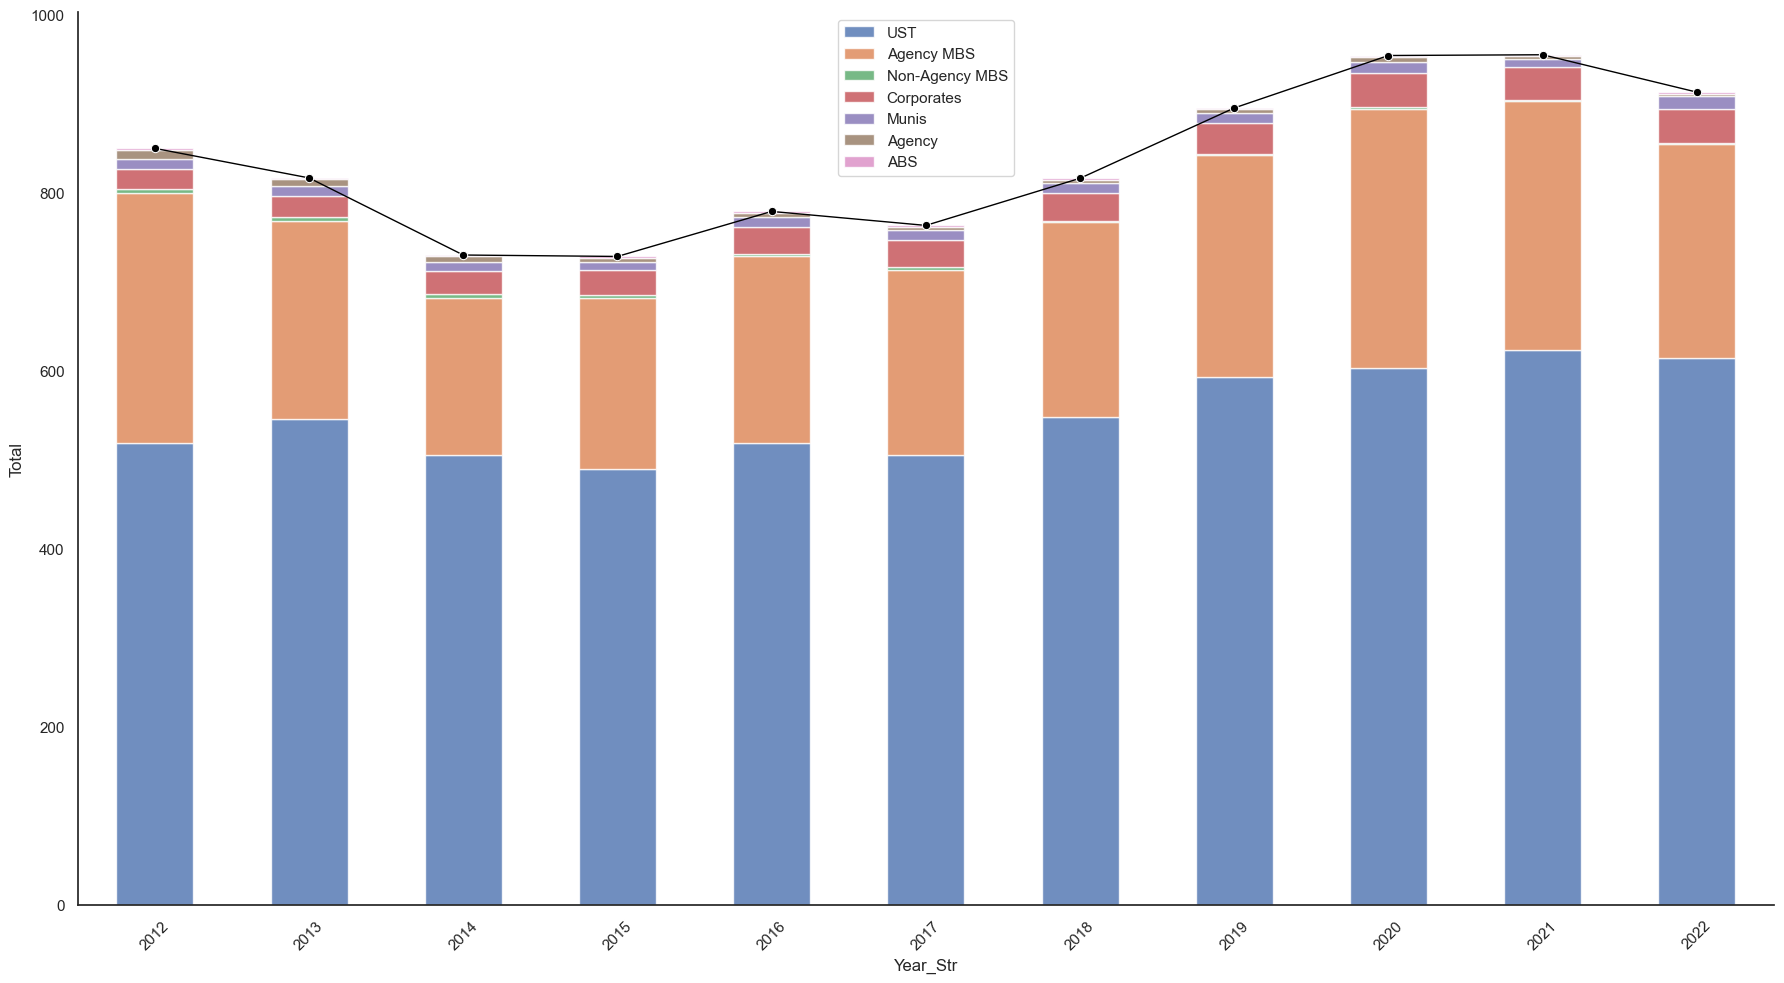

In [29]:
columns = ['UST', 'Agency MBS', 'Non-Agency MBS', 'Corporates', 'Munis', 'Agency', 'ABS']
df_sifma_trade['Year_Str'] = df_sifma_trade['Year'].astype(str)

# Set the figure size for combined plot
plt.figure(figsize=(18, 10))

# Plot stacked bar chart using 'Year_Str'
ax = plt.gca()  # Get the current Axes instance
df_sifma_trade.set_index('Year_Str')[columns].plot(kind='bar', stacked=True, alpha=0.8, ax=ax)

# Draw line plot with Seaborn using 'Year_Str'
sns.lineplot(x='Year_Str', y='Total', data=df_sifma_trade, color = 'black', linewidth=1, marker='o')

# Set x-tickers to display all years using 'Year_Str'
ax.set_xticks(range(len(df_sifma_trade['Year_Str'])))  # Set x-ticks to match all years in your DataFrame
ax.set_xticklabels(df_sifma_trade['Year_Str'], rotation=45)  # Set x-tick labels with rotation for better visibility
# Remove top and right spines

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Only Institutional Investor Holdings Fixed Income

## Institutional Investor Percentage - Line Plot

In [30]:
# df_market_sums_yearly = df_market_sums[df_market_sums.index.str.endswith('Q4')]
# df_market_sums_yearly = df_market_sums_yearly.loc['2012Q4':'2021Q4']

# # Convert the index to year for alignment
# df_market_sums_yearly.index = df_market_sums_yearly.index.str[:4].astype(int)

# # Sum across all market types for each year in df_market_sums_yearly
# institutional_volume_yearly = df_market_sums_yearly.sum(axis=1)

# # Step 2: Calculate Percentage
# # Assuming you have a DataFrame named df with a 'Total' column containing the total volume of Fixed Income for each year
# df_sifma_out.set_index('Year', inplace=True)

# # Calculate the percentage
# percentage_owned_by_institutional = (institutional_volume_yearly / df_sifma_out['Total'] / 1e9) * 100

# # Convert to DataFrame for easier handling and visualization
# df_percentage_owned_by_institutional = percentage_owned_by_institutional.to_frame(name='Percentage Owned by Institutional')

# df_sifma_out.reset_index(inplace=True)

# plt.figure(figsize=(18, 10))
# plt.plot(df_percentage_owned_by_institutional.index, df_percentage_owned_by_institutional['Percentage Owned by Institutional'], linestyle='-', color='b')
# plt.title('Percentage of Fixed Income Owned by Institutional Investors Over Years',fontsize=16)
# plt.xlabel('Year')
# plt.ylabel('Percentage Owned by Institutional (%)')
# ax = plt.gca()  # Get the current Axes instance
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# # Add value labels to each data point
# for year, percentage in zip(df_percentage_owned_by_institutional.index, df_percentage_owned_by_institutional['Percentage Owned by Institutional']):
#     plt.text(year, percentage, f'{percentage:.3f}%', ha='center', va='bottom', fontsize=14)

# # Show all x-tick labels
# plt.xticks(df_percentage_owned_by_institutional.index, rotation=45)

# plt.grid(False)
# plt.show()


# Correlation Study - Macro Economic Indicator Correlation

## GDP-Based Recession Index vs. Total Bond Market size

In [31]:
# Convert the 'DATE' column to datetime
df_recession['DATE'] = pd.to_datetime(df_recession['DATE'])

# Extract the year from the 'DATE' column
df_recession['YEAR'] = df_recession['DATE'].dt.year

# Aggregate the recession index by year
df_recession_yearly = df_recession.groupby('YEAR').mean().reset_index()

# Merge the two dataframes on the year columns
merged_df = df_sifma_market.merge(df_recession_yearly, left_on='period', right_on='YEAR', how='left')

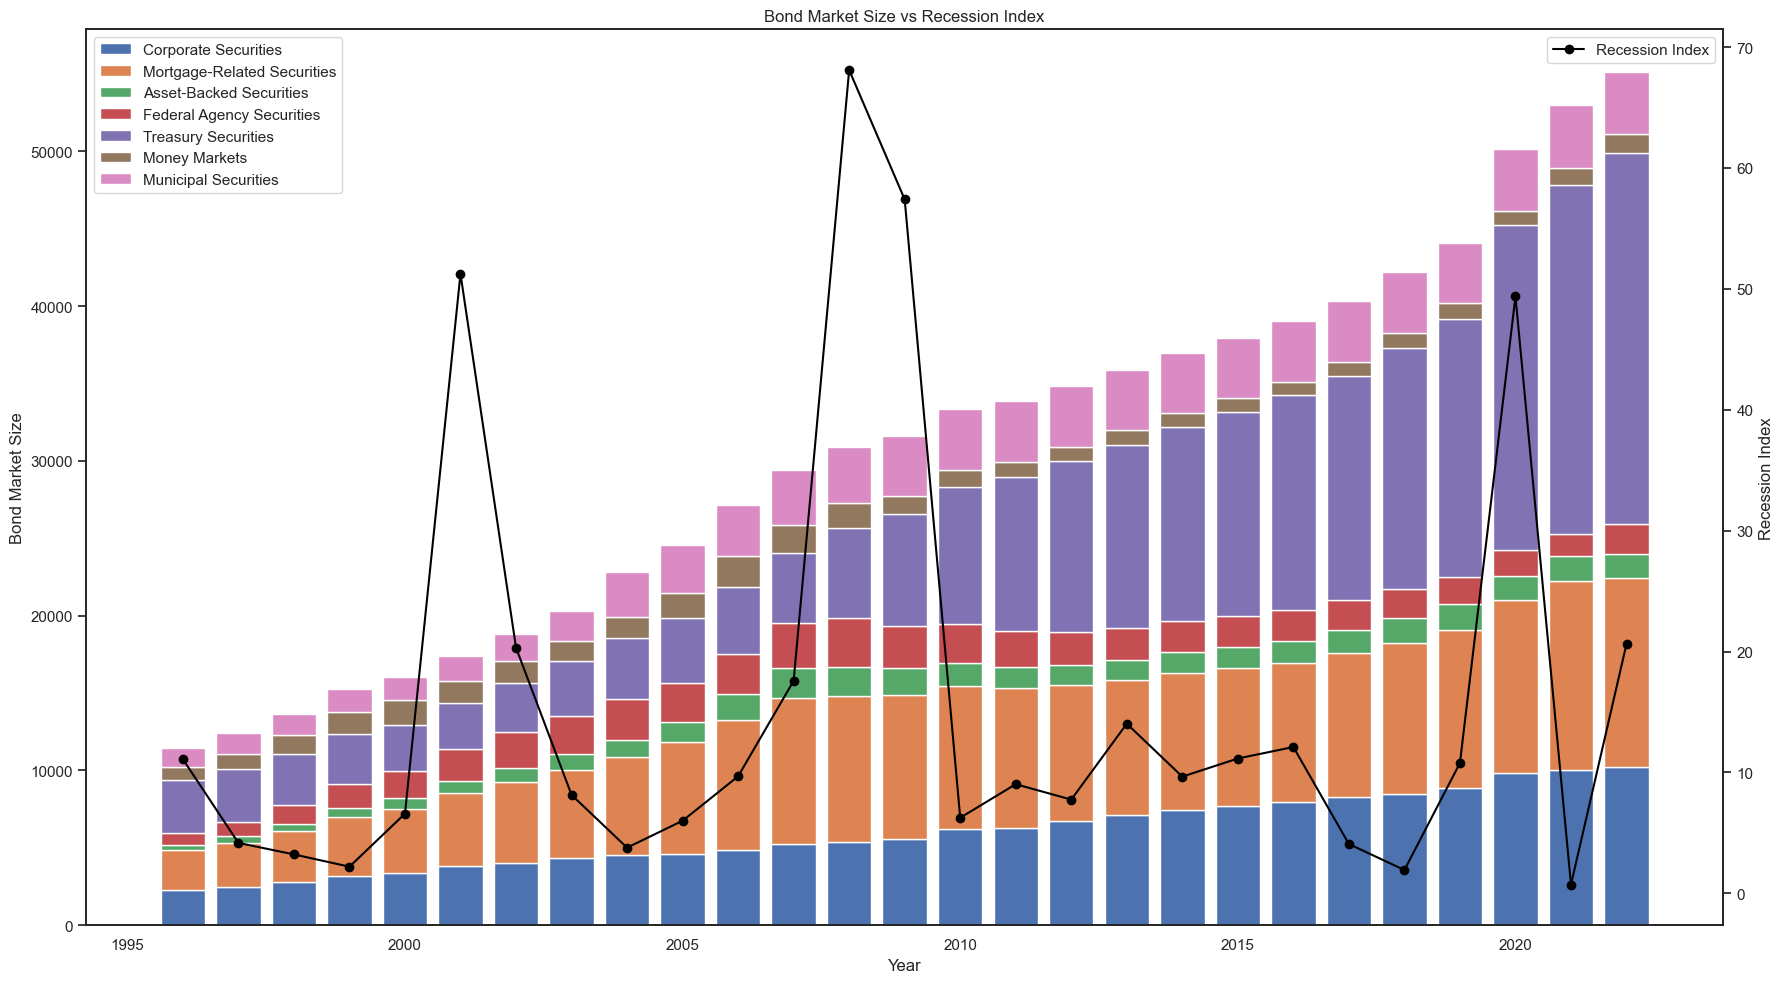

In [32]:
columns = ['Corporate Securities', 'Mortgage-Related Securities', 'Asset-Backed Securities',
                'Federal Agency Securities', 'Treasury Securities', 'Money Markets', 'Municipal Securities']
# Extracting data
years = merged_df['period'].values
bond_sizes = merged_df[columns].values
recession_index = merged_df['JHGDPBRINDX'].values

# Plotting the bond market size as a stacked bar chart
fig, ax1 = plt.subplots(figsize=(18, 10))
ax1.bar(years, bond_sizes[:, 0], label=columns[0])
for i in range(1, len(columns)):
    ax1.bar(years, bond_sizes[:, i], bottom=bond_sizes[:, :i].sum(axis=1), label=columns[i])
ax1.set_xlabel('Year')
ax1.set_ylabel('Bond Market Size')
ax1.set_title('Bond Market Size vs Recession Index')
ax1.legend(loc='upper left')

# Creating a secondary y-axis for the recession index
ax2 = ax1.twinx()
ax2.plot(years, recession_index, 'o-', color='black', label='Recession Index')
ax2.set_ylabel('Recession Index')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## GDP-Based Recession Index vs. Separate Bond Market size

In [33]:
# Ensure dataframe is sorted by year/period
merged_df = merged_df.sort_values(by='period')

# Calculate year-on-year growth rates for the columns in `merged_df`
df_growth_rates = merged_df.set_index('period')[columns].pct_change() * 100  # Convert to percentage

df_growth_rate_temp = merged_df[columns].pct_change() * 100  # Convert to percentage
df_growth_rate_temp['period'] = merged_df['period']

# Merge the two dataframes on the year columns
merged_df = df_growth_rate_temp.merge(df_recession_yearly, left_on='period', right_on='YEAR', how='left')

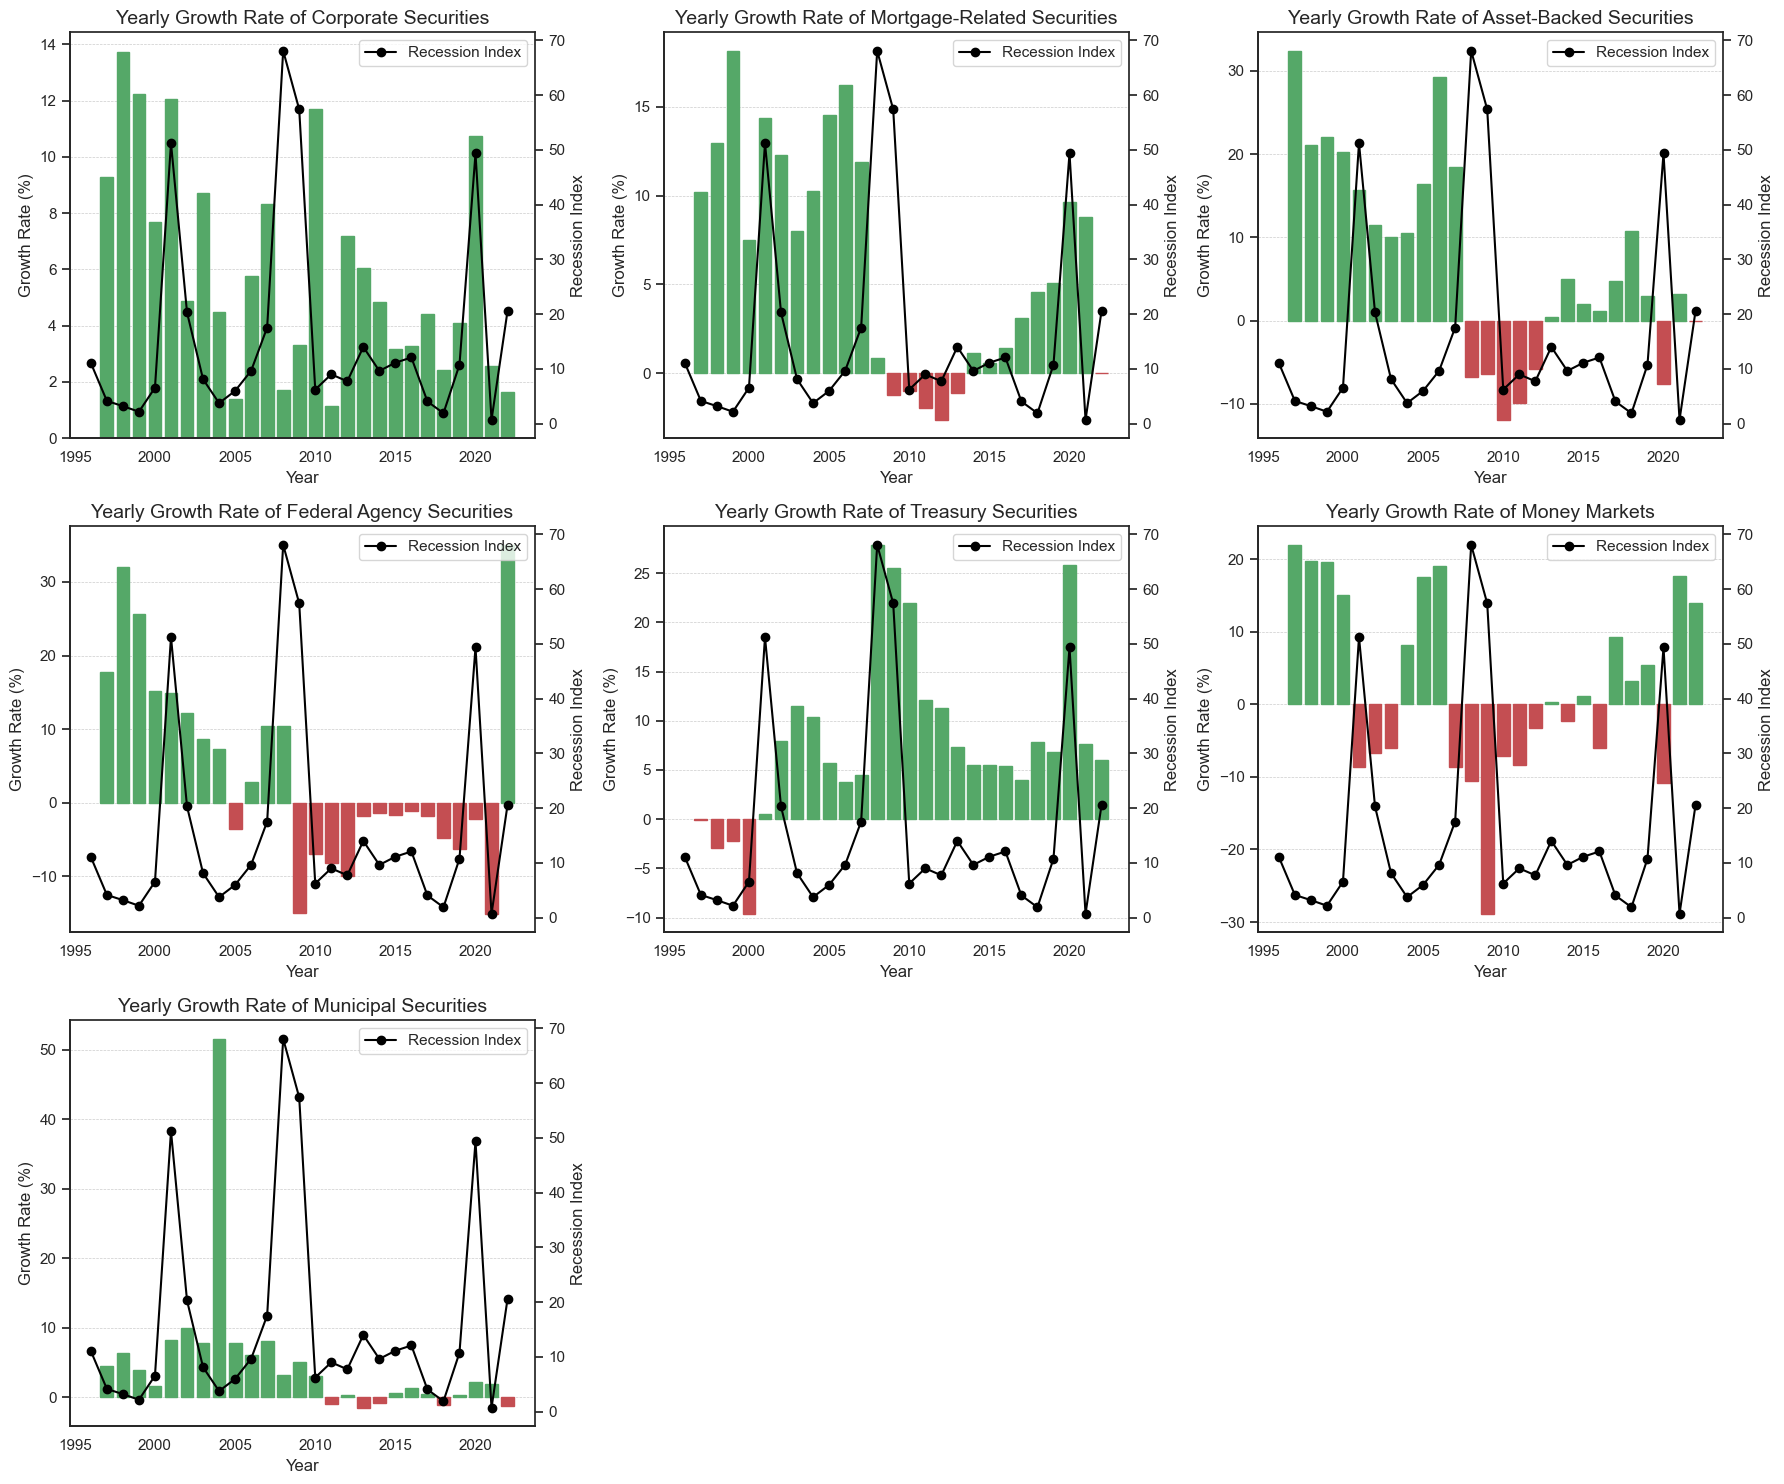

In [34]:
# Set the figure size
plt.figure(figsize=(18, 15))

# Plot each bond type as a separate subplot
for i, col in enumerate(columns):
    ax1 = plt.subplot(3, 3, i+1)
    
    # Bar plot for growth rate
    colors = ['g' if val > 0 else 'r' for val in df_growth_rates[col]]
    bars = ax1.bar(df_growth_rates.index, df_growth_rates[col], color=colors)
    
    # Add recession index as a line plot on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(merged_df['period'], merged_df['JHGDPBRINDX'], 'o-', color='black', label='Recession Index')
    
    # Set title, labels, and legends
    ax1.set_title(f'Yearly Growth Rate of {col}', fontsize=14)
    ax1.set_ylabel('Growth Rate (%)')
    ax1.set_xlabel('Year')
    ax2.set_ylabel('Recession Index')
    ax2.legend(loc='upper right')
    
    # Highlight positive growth rates in green and negative in red
    for bar, growth_rate in zip(bars, df_growth_rates[col]):
        if growth_rate > 0:
            bar.set_color('g')
        else:
            bar.set_color('r')
    
    # Grid lines for better clarity
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

## Recession: Correlation Coefficient for each bond type

In [35]:
# Assuming merged_df is your dataframe
pearson_correlations = []
spearman_correlations = []

# Loop through each bond type
for col in columns:
    pearson_corr = merged_df[col].corr(merged_df['JHGDPBRINDX'], method='pearson')
    spearman_corr = merged_df[col].corr(merged_df['JHGDPBRINDX'], method='spearman')
    
    pearson_correlations.append(pearson_corr)
    spearman_correlations.append(spearman_corr)

# Create a dataframe to display results
results_df = pd.DataFrame({
    'Bond Type': columns,
    'Pearson Correlation': pearson_correlations,
    'Spearman Rank Correlation': spearman_correlations
})

display(results_df)

,Bond Type,Pearson Correlation,Spearman Rank Correlation
0,Corporate Securities,-0.027279,-0.097436
1,Mortgage-Related Securities,-0.128341,-0.251966
2,Asset-Backed Securities,-0.361008,-0.403761
3,Federal Agency Securities,-0.010258,0.097436
4,Treasury Securities,0.607365,0.305983
5,Money Markets,-0.655565,-0.712821
6,Municipal Securities,-0.055837,0.033162


## Unemployment Rate Correlation vs. Bond Market Size

In [36]:
# Convert the 'DATE' column to datetime
df_unemployment['DATE'] = pd.to_datetime(df_unemployment['DATE'])

# Extract the year from the 'DATE' column
df_unemployment['YEAR'] = df_unemployment['DATE'].dt.year

# Aggregate the recession index by year
df_unemployment_yearly = df_unemployment.groupby('YEAR').mean().reset_index()

# Merge the two dataframes on the year columns
merged_df_unemp = df_sifma_market.merge(df_unemployment_yearly, left_on='period', right_on='YEAR', how='left')

merged_df_unemp.head(5)

,period,Corporate Securities,Mortgage-Related Securities,Asset-Backed Securities,Federal Agency Securities,Treasury Securities,Money Markets,Municipal Securities,Outstanding (Total),YEAR,DATE,UNRATE
0,1996,2264.773,2606.4283,298.1845,785.484292,3444.691,802.977,1261.631,11464.169092,1996,1996-06-16 08:00:00,5.408333
1,1997,2474.749,2871.7711,394.8521,924.837831,3441.817,979.423,1318.530,12405.980031,1997,1997-06-16 12:00:00,4.941667
2,1998,2814.818,3243.3778,478.0265,1221.219139,3340.457,1172.560,1402.728,13673.186439,1998,1998-06-16 12:00:00,4.500000
3,1999,3158.932,3832.2017,583.4654,1534.856398,3265.983,1402.444,1457.089,15234.971498,1999,1999-06-16 12:00:00,4.216667
4,2000,3401.451,4119.3099,701.8751,1767.553183,2951.886,1613.994,1480.713,16036.782183,2000,2000-06-16 08:00:00,3.966667


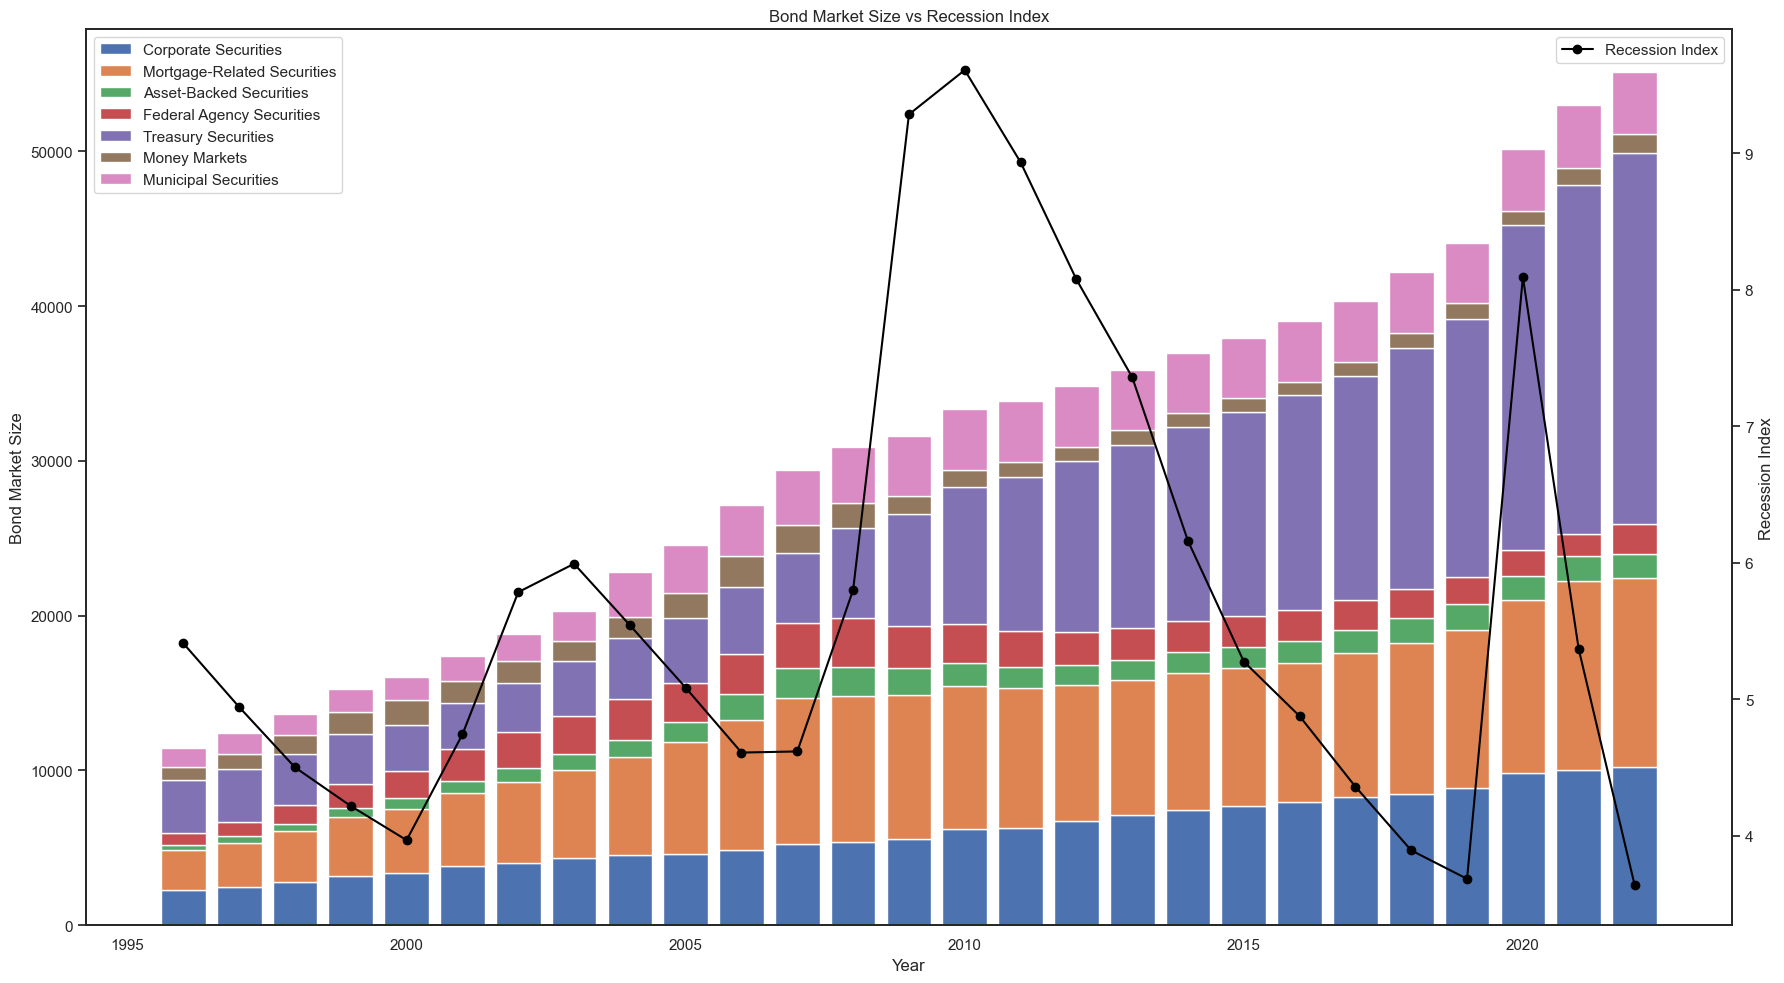

In [37]:
# Extracting data
years = merged_df_unemp['period'].values
bond_sizes = merged_df_unemp[columns].values
recession_index = merged_df_unemp['UNRATE'].values

# Plotting the bond market size as a stacked bar chart
fig, ax1 = plt.subplots(figsize=(18, 10))
ax1.bar(years, bond_sizes[:, 0], label=columns[0])
for i in range(1, len(columns)):
    ax1.bar(years, bond_sizes[:, i], bottom=bond_sizes[:, :i].sum(axis=1), label=columns[i])
ax1.set_xlabel('Year')
ax1.set_ylabel('Bond Market Size')
ax1.set_title('Bond Market Size vs Recession Index')
ax1.legend(loc='upper left')

# Creating a secondary y-axis for the recession index
ax2 = ax1.twinx()
ax2.plot(years, recession_index, 'o-', color='black', label='Recession Index')
ax2.set_ylabel('Recession Index')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Unemployment Rate Correlation vs. Separate Bond Market size

In [38]:
# Merge the two dataframes on the year columns
merged_df_unemp = df_growth_rate_temp.merge(df_unemployment_yearly, left_on='period', right_on='YEAR', how='left')

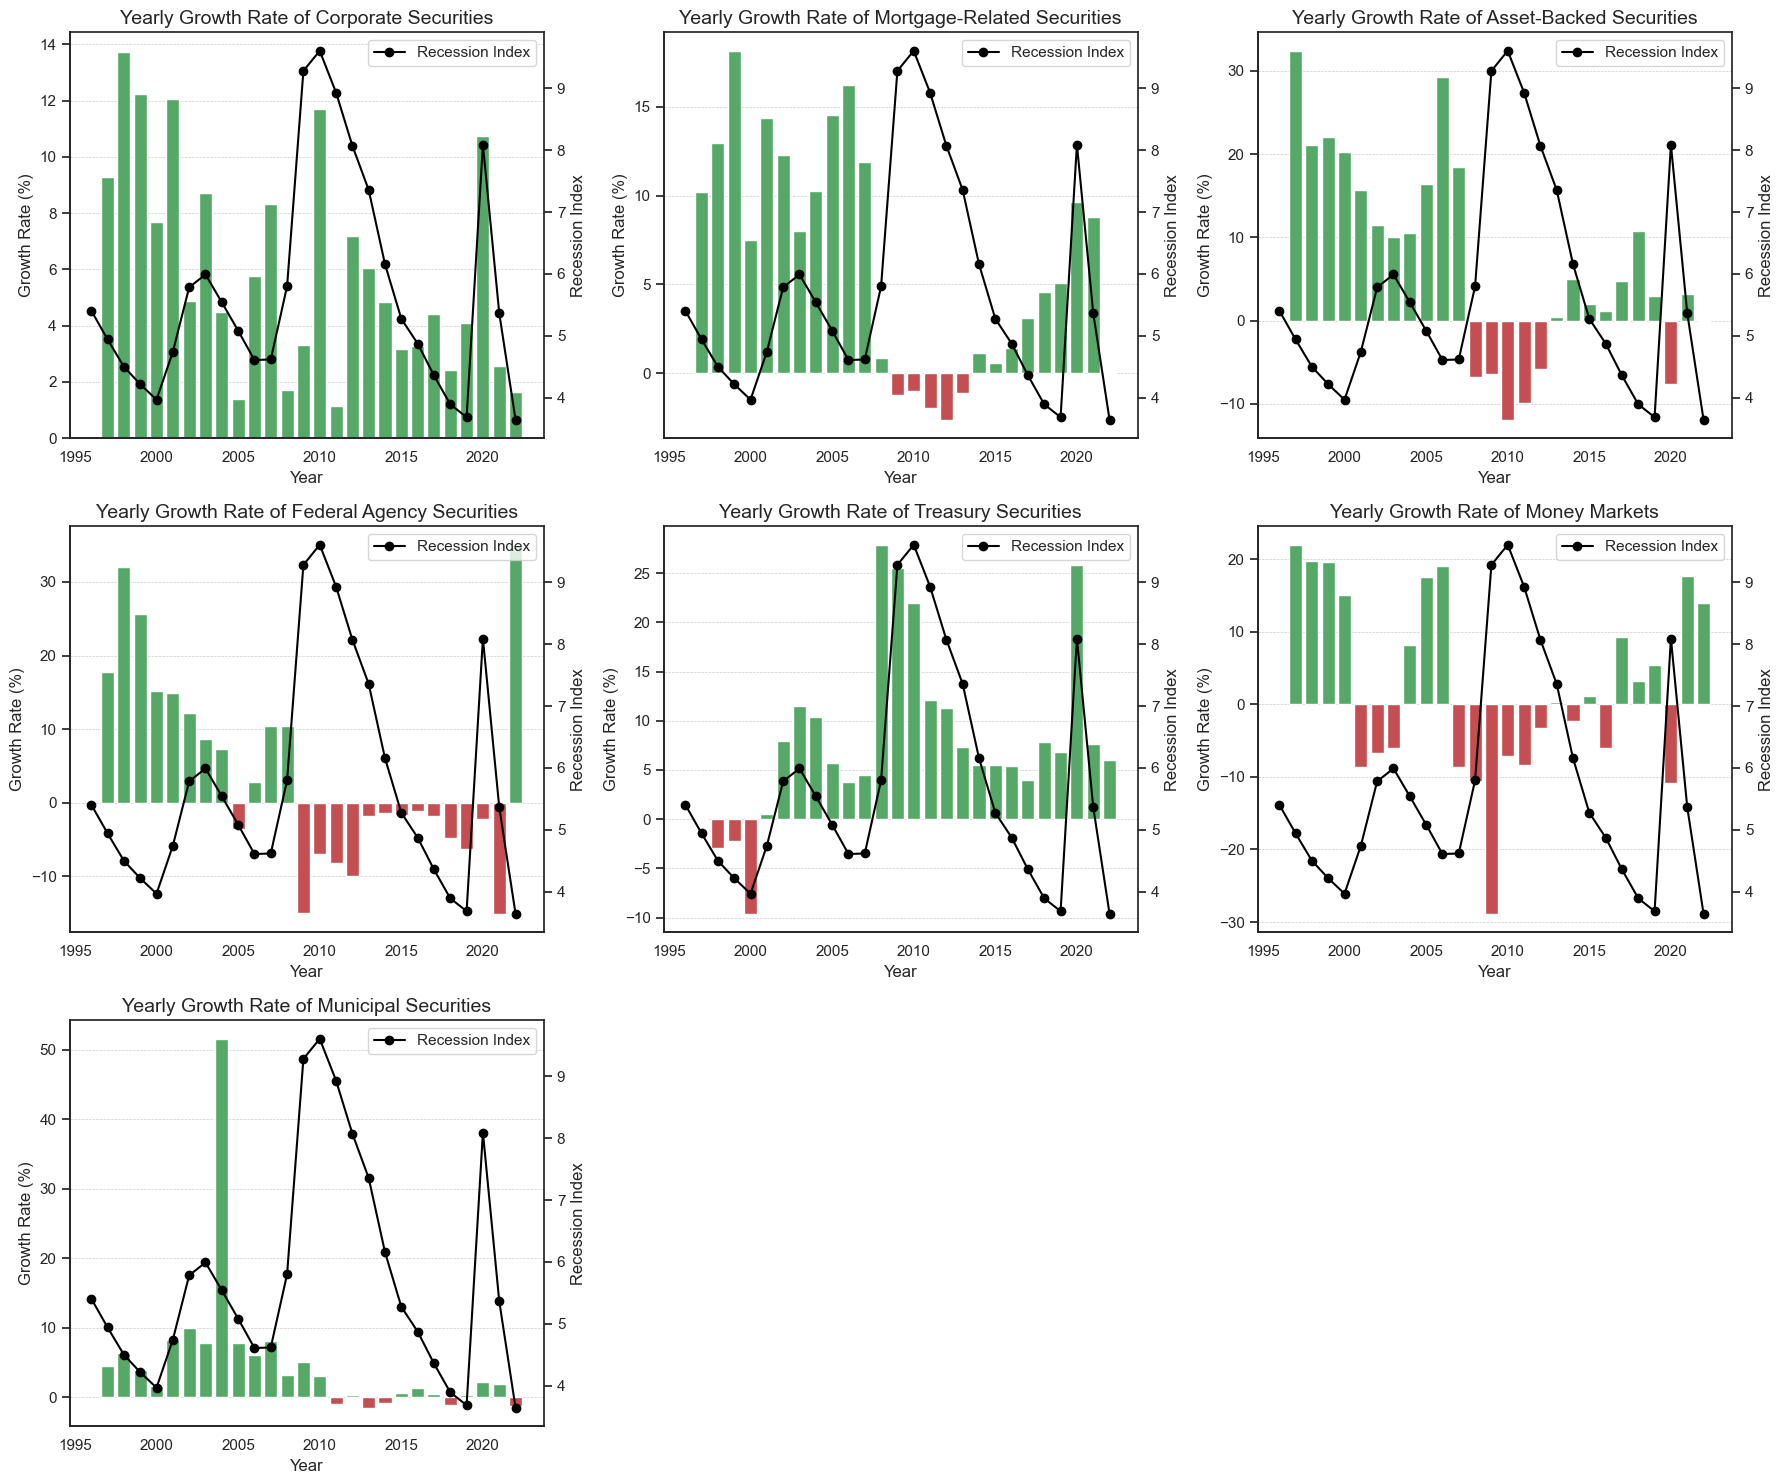

In [39]:
df_growth_rates_unemp = df_growth_rate_temp.set_index('period')

# Set the figure size
plt.figure(figsize=(18, 15))

# Plot each bond type as a separate subplot
for i, col in enumerate(columns):
    ax1 = plt.subplot(3, 3, i+1)
    
    # Bar plot for growth rate with color based on the value
    colors = ['g' if val > 0 else 'r' for val in df_growth_rates[col]]
    ax1.bar(df_growth_rates.index, df_growth_rates[col], color=colors)
    
    # Add recession index as a line plot on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(merged_df_unemp['period'], merged_df_unemp['UNRATE'], 'o-', color='black', label='Recession Index')
    
    # Set title, labels, and legends
    ax1.set_title(f'Yearly Growth Rate of {col}', fontsize=14)
    ax1.set_ylabel('Growth Rate (%)')
    ax1.set_xlabel('Year')
    ax2.set_ylabel('Recession Index')
    ax2.legend(loc='upper right')
    
    # Grid lines for better clarity
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


## Unemployment: Correlation Coefficient for each bond type

In [40]:
# Assuming merged_df is your dataframe
pearson_correlations = []
spearman_correlations = []

# Loop through each bond type
for col in columns:
    pearson_corr = merged_df_unemp[col].corr(merged_df_unemp['UNRATE'], method='pearson')
    spearman_corr = merged_df_unemp[col].corr(merged_df_unemp['UNRATE'], method='spearman')
    
    pearson_correlations.append(pearson_corr)
    spearman_correlations.append(spearman_corr)

# Create a dataframe to display results
results_df = pd.DataFrame({
    'Bond Type': columns,
    'Pearson Correlation': pearson_correlations,
    'Spearman Rank Correlation': spearman_correlations
})

display(results_df)

,Bond Type,Pearson Correlation,Spearman Rank Correlation
0,Corporate Securities,0.047613,0.023590
1,Mortgage-Related Securities,-0.504638,-0.450256
2,Asset-Backed Securities,-0.671333,-0.597949
3,Federal Agency Securities,-0.544681,-0.496752
4,Treasury Securities,0.705904,0.703248
5,Money Markets,-0.641211,-0.599316
6,Municipal Securities,-0.048556,0.069402


## After 2008: Unemployment Rate Correlation vs. Separate Bond Market size

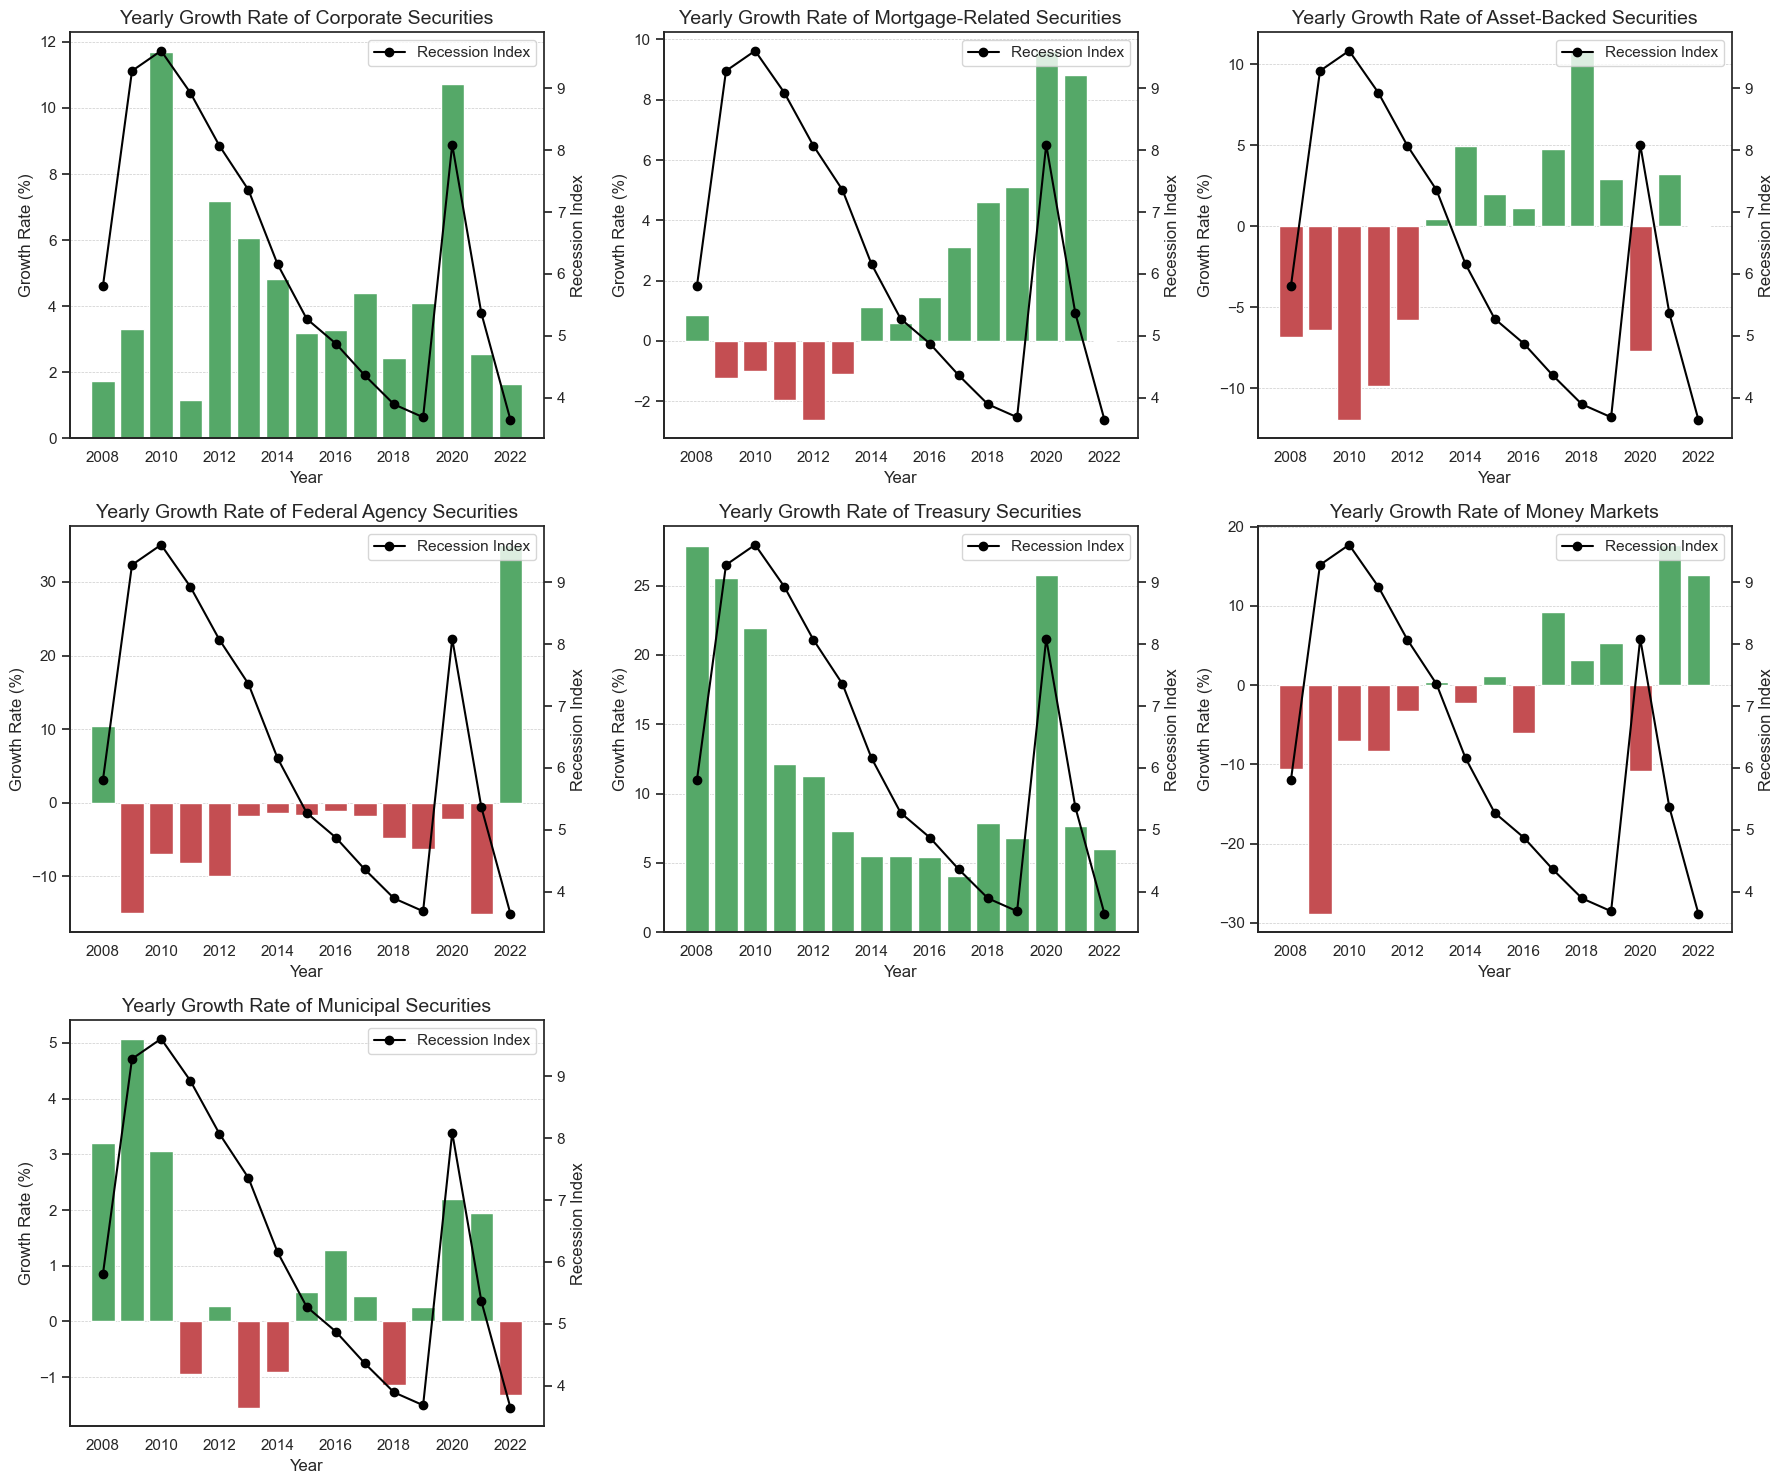

In [41]:
merged_df_unemp_2008 = merged_df_unemp[merged_df_unemp['period']>= 2008]
# Convert the 'DATE' column to datetime
df_unemployment['DATE'] = pd.to_datetime(df_unemployment['DATE'])

# Extract the year from the 'DATE' column
df_unemployment['YEAR'] = df_unemployment['DATE'].dt.year

# Aggregate the recession index by year
df_unemployment_yearly = df_unemployment.groupby('YEAR').mean().reset_index()

# Merge the two dataframes on the year columns
merged_df_unemp = df_sifma_market.merge(df_unemployment_yearly, left_on='period', right_on='YEAR', how='left')

df_growth_rate_temp_2008 = merged_df_unemp[columns].pct_change() * 100  # Convert to percentage
df_growth_rate_temp_2008['period'] = merged_df_unemp_2008['period']
df_growth_rate_temp_2008 = df_growth_rate_temp_2008[df_growth_rate_temp_2008['period'] >= 2008]
df_growth_rate_temp_2008 = df_growth_rate_temp_2008.set_index('period')

# Set the figure size
plt.figure(figsize=(18, 15))

# Plot each bond type as a separate subplot
for i, col in enumerate(columns):
    ax1 = plt.subplot(3, 3, i+1)
    
    # Bar plot for growth rate with color based on the value
    colors = ['g' if val > 0 else 'r' for val in df_growth_rate_temp_2008[col]]
    ax1.bar(df_growth_rate_temp_2008.index, df_growth_rate_temp_2008[col], color=colors)
    
    # Add recession index as a line plot on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(merged_df_unemp_2008['period'], merged_df_unemp_2008['UNRATE'], 'o-', color='black', label='Recession Index')
    
    # Set title, labels, and legends
    ax1.set_title(f'Yearly Growth Rate of {col}', fontsize=14)
    ax1.set_ylabel('Growth Rate (%)')
    ax1.set_xlabel('Year')
    ax2.set_ylabel('Recession Index')
    ax2.legend(loc='upper right')
    
    # Grid lines for better clarity
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


## After 2008: Unemployment: Correlation Coefficient for each bond type

In [42]:
# Assuming merged_df is your dataframe
pearson_correlations = []
spearman_correlations = []

# Loop through each bond type
for col in columns:
    pearson_corr = merged_df_unemp_2008[col].corr(merged_df_unemp_2008['UNRATE'], method='pearson')
    spearman_corr = merged_df_unemp_2008[col].corr(merged_df_unemp_2008['UNRATE'], method='spearman')
    
    pearson_correlations.append(pearson_corr)
    spearman_correlations.append(spearman_corr)

# Create a dataframe to display results
results_df = pd.DataFrame({
    'Bond Type': columns,
    'Pearson Correlation': pearson_correlations,
    'Spearman Rank Correlation': spearman_correlations
})

display(results_df)

,Bond Type,Pearson Correlation,Spearman Rank Correlation
0,Corporate Securities,0.526286,0.435714
1,Mortgage-Related Securities,-0.385575,-0.496429
2,Asset-Backed Securities,-0.814406,-0.692857
3,Federal Agency Securities,-0.458413,-0.478571
4,Treasury Securities,0.631468,0.635714
5,Money Markets,-0.704094,-0.764286
6,Municipal Securities,0.429384,0.432143


## CPI vs. Bond Market Size

In [43]:
# Convert the 'DATE' column to datetime
df_cpi['DATE'] = pd.to_datetime(df_cpi['DATE'])

# Extract the year from the 'DATE' column
df_cpi['YEAR'] = df_cpi['DATE'].dt.year

# Aggregate the recession index by year
df_cpi_yearly = df_cpi.groupby('YEAR').mean().reset_index()

# Merge the two dataframes on the year columns
merged_df_cpi = df_growth_rate_temp.merge(df_cpi_yearly, left_on='period', right_on='YEAR', how='left')

# merged_df_cpi.head(5)

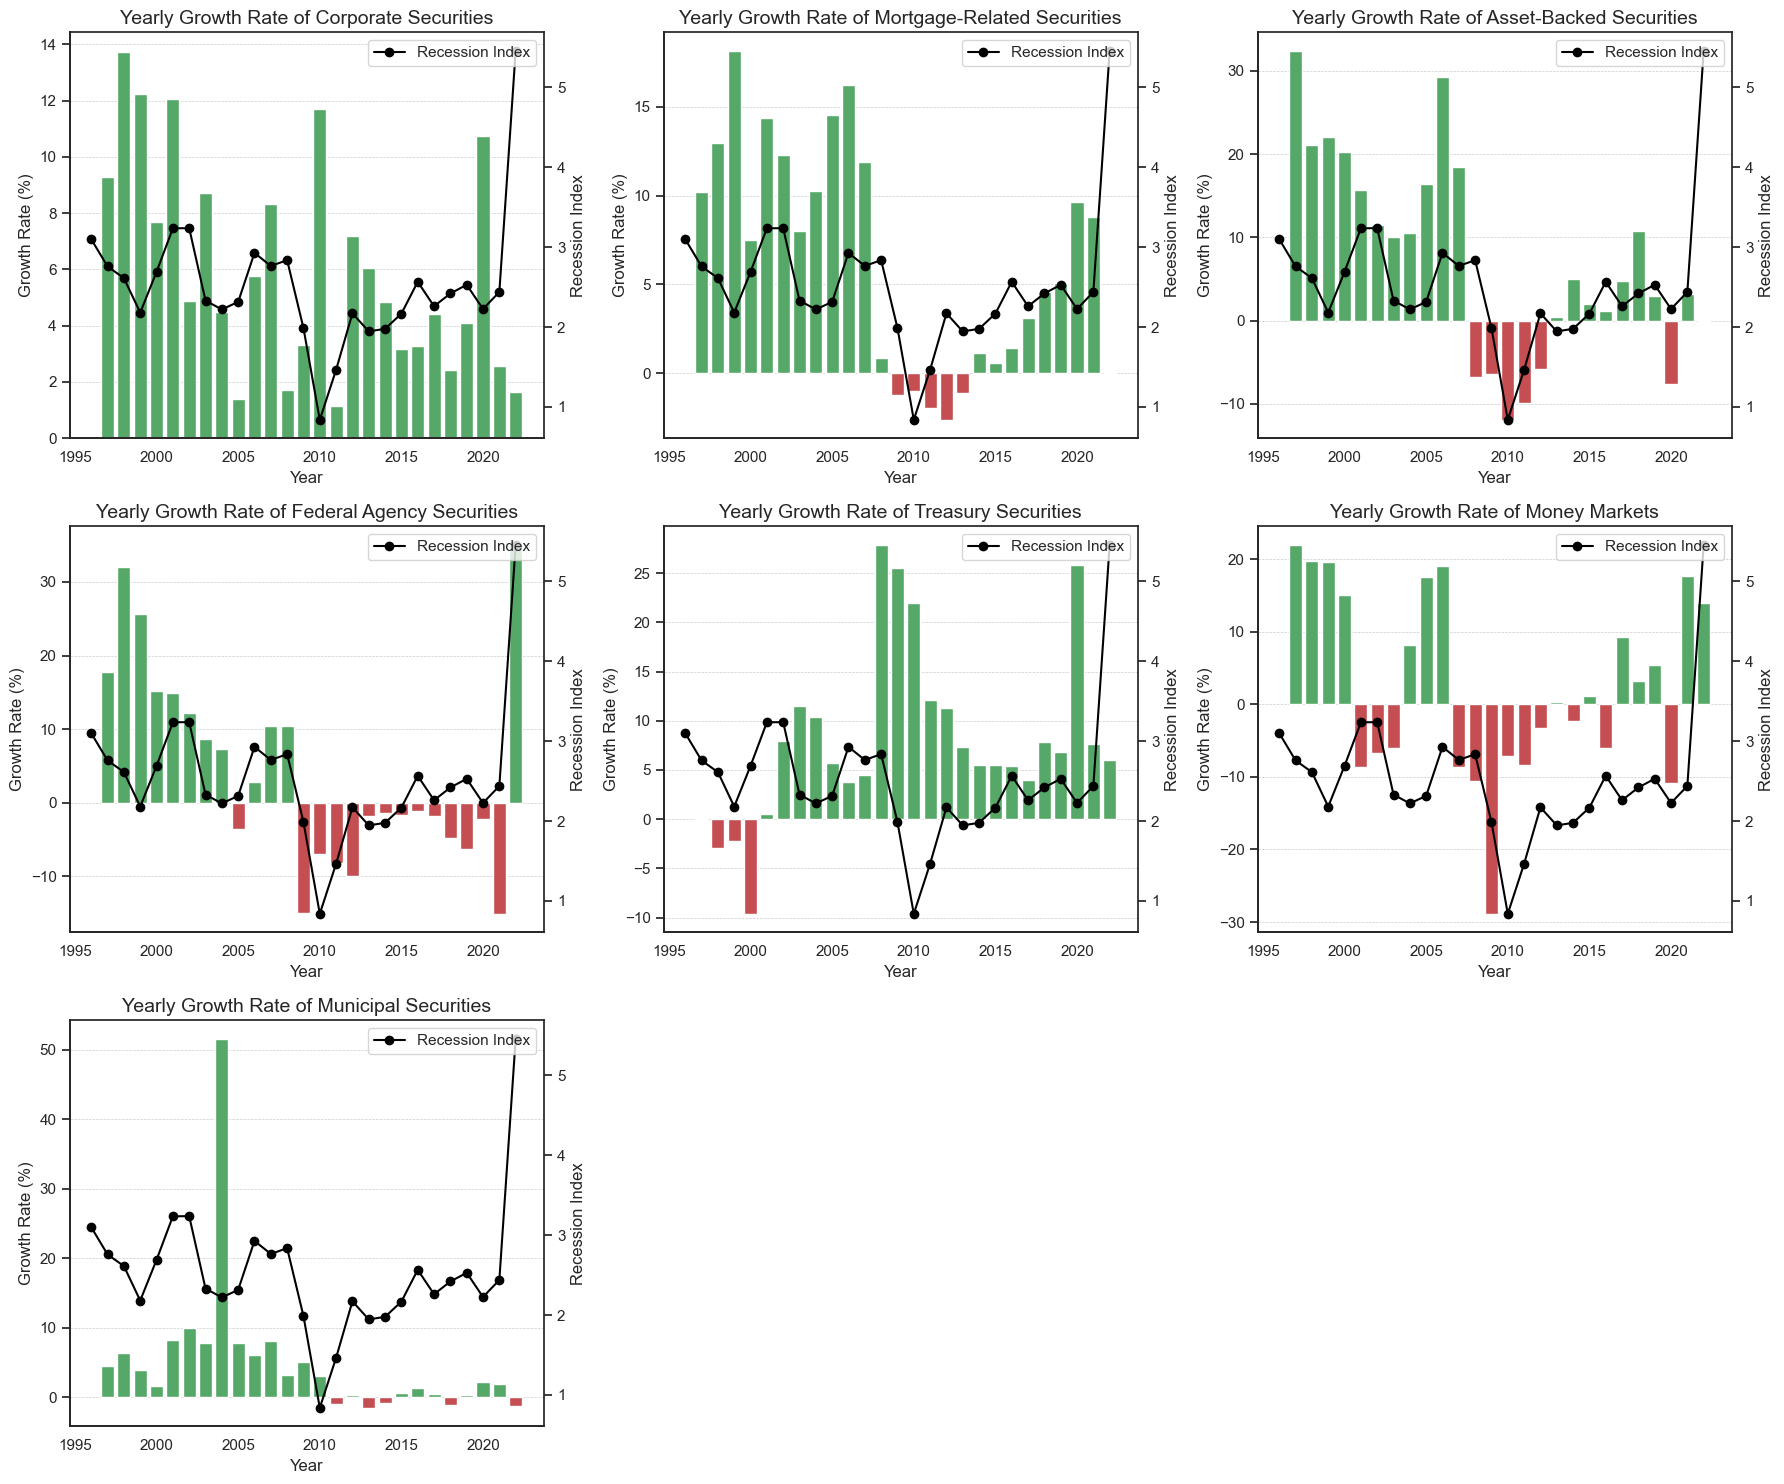

In [44]:
# Set the figure size
plt.figure(figsize=(18, 15))

# Plot each bond type as a separate subplot
for i, col in enumerate(columns):
    ax1 = plt.subplot(3, 3, i+1)
    
    # Bar plot for growth rate with color based on the value
    colors = ['g' if val > 0 else 'r' for val in df_growth_rates[col]]
    ax1.bar(df_growth_rates.index, df_growth_rates[col], color=colors)
    
    # Add recession index as a line plot on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(merged_df_cpi['period'], merged_df_cpi['CORESTICKM159SFRBATL'], 'o-', color='black', label='Recession Index')
    
    # Set title, labels, and legends
    ax1.set_title(f'Yearly Growth Rate of {col}', fontsize=14)
    ax1.set_ylabel('Growth Rate (%)')
    ax1.set_xlabel('Year')
    ax2.set_ylabel('Recession Index')
    ax2.legend(loc='upper right')
    
    # Grid lines for better clarity
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


In [45]:
# Assuming merged_df is your dataframe
pearson_correlations = []
spearman_correlations = []
kendall_correlations = []

# Loop through each bond type
for col in columns:
    pearson_corr = merged_df_cpi[col].corr(merged_df_cpi['CORESTICKM159SFRBATL'], method='pearson')
    spearman_corr = merged_df_cpi[col].corr(merged_df_cpi['CORESTICKM159SFRBATL'], method='spearman')
    kendall_corr = merged_df_cpi[col].corr(merged_df_cpi['CORESTICKM159SFRBATL'], method='kendall')
    
    pearson_correlations.append(pearson_corr)
    spearman_correlations.append(spearman_corr)
    kendall_correlations.append(kendall_corr)

# Create a dataframe to display results
results_df = pd.DataFrame({
    'Bond Type': columns,
    'Pearson Correlation': pearson_correlations,
    'Spearman Rank Correlation': spearman_correlations,
    'Kendall Tau Correlation': kendall_correlations
})

display(results_df)

,Bond Type,Pearson Correlation,Spearman Rank Correlation,Kendall Tau Correlation
0,Corporate Securities,-0.159629,0.032479,0.003077
1,Mortgage-Related Securities,0.210795,0.511111,0.341538
2,Asset-Backed Securities,0.292156,0.484444,0.335385
3,Federal Agency Securities,0.638636,0.623248,0.415385
4,Treasury Securities,-0.288123,-0.372991,-0.273846
5,Money Markets,0.272092,0.182906,0.150769
6,Municipal Securities,-0.025166,0.353846,0.280000


## Housing Price Index vs. Bond Size

In [46]:
# Group by Year and calculate the mean for Index_SA
yearly_housing_index = df_housing_price.groupby('Year')['Index_SA'].mean().reset_index()

merged_df_house = df_growth_rate_temp.merge(yearly_housing_index, left_on='period', right_on='Year', how='left')

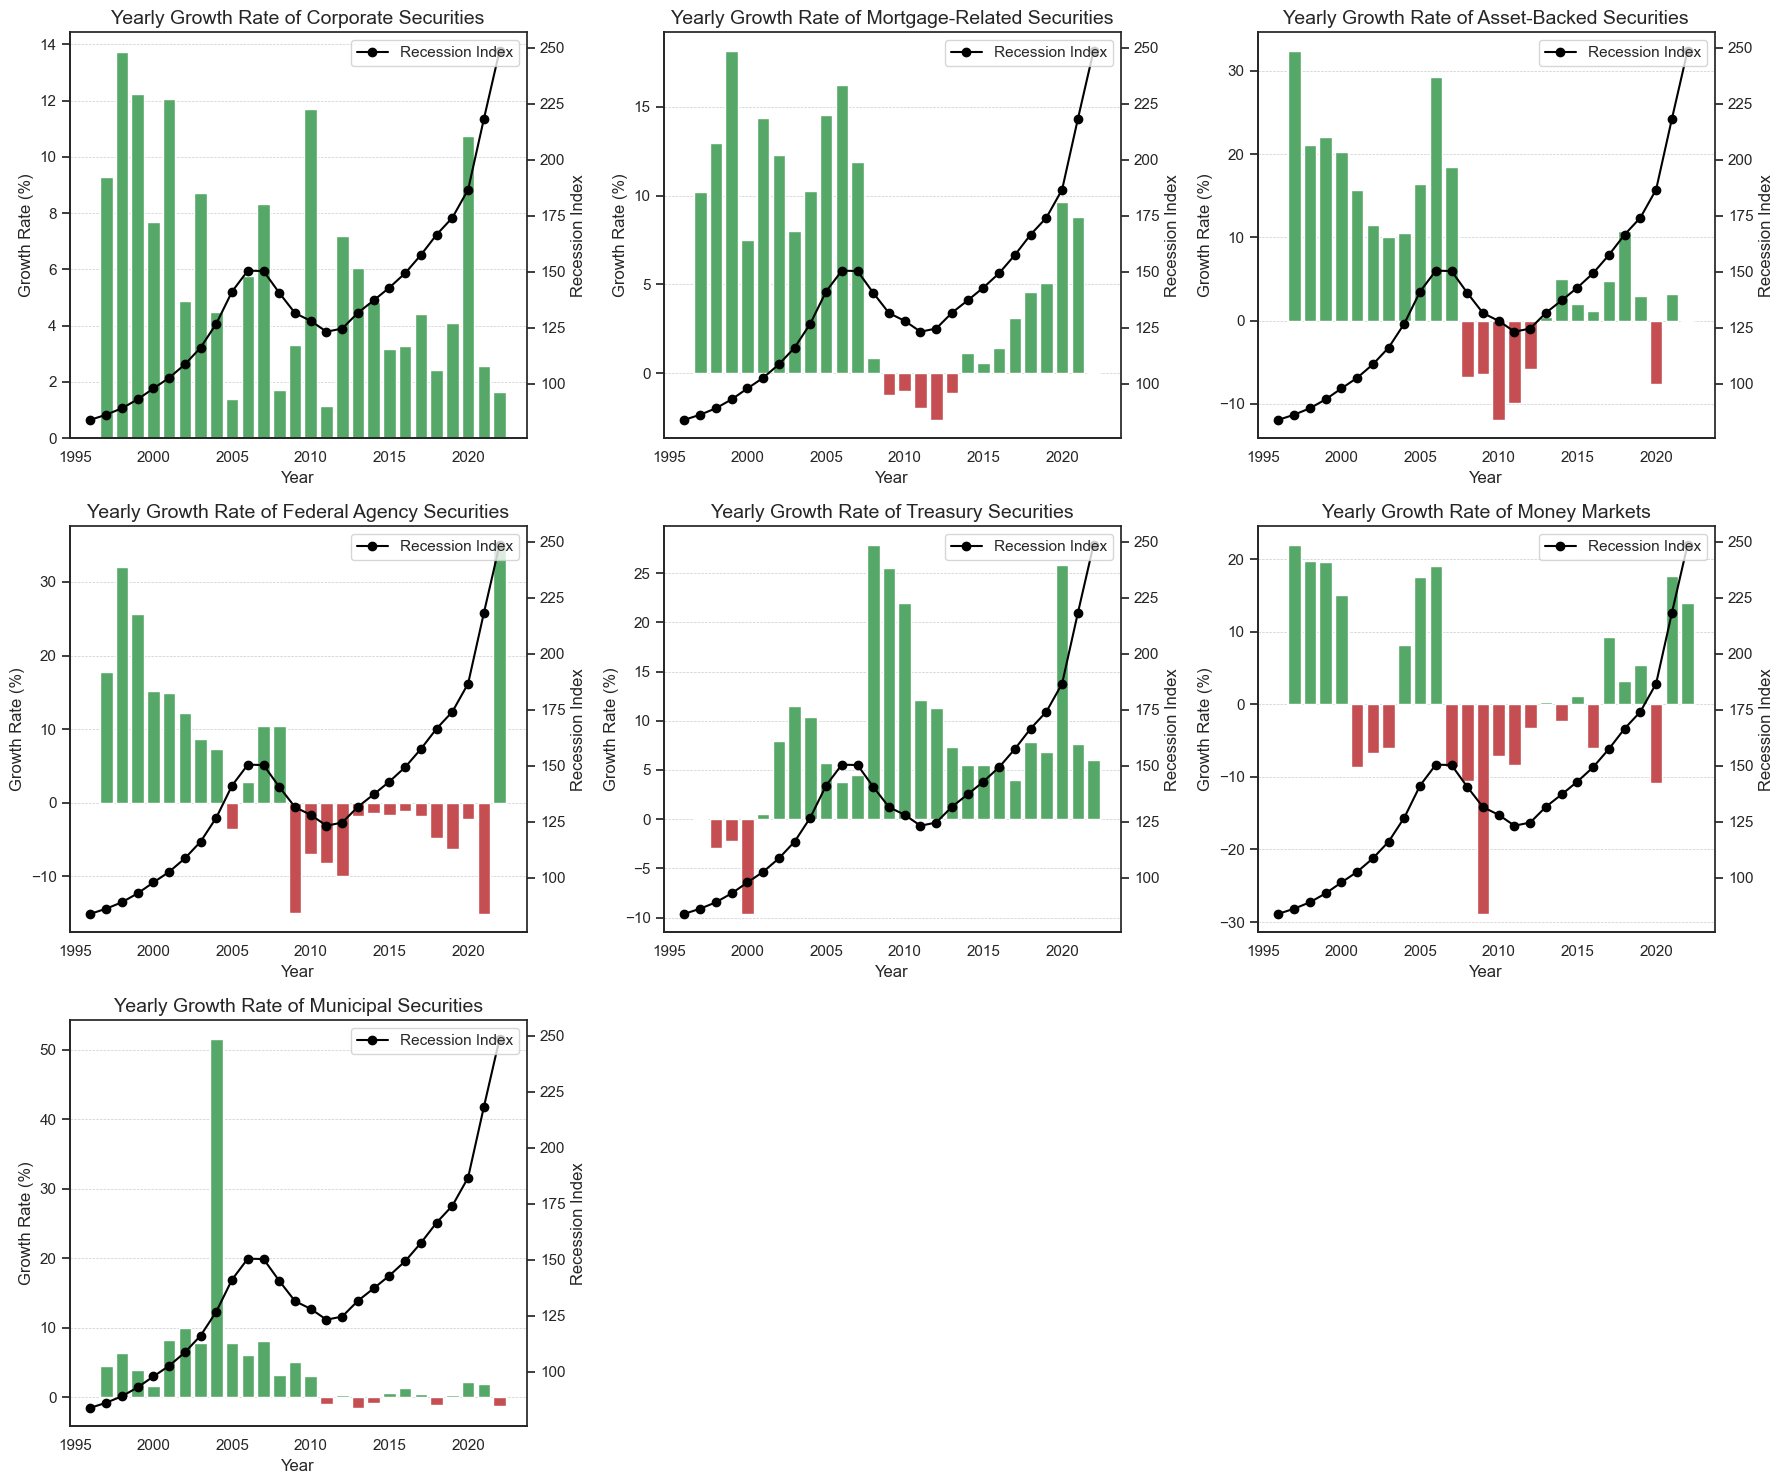

In [47]:
# Set the figure size
plt.figure(figsize=(18, 15))

# Plot each bond type as a separate subplot
for i, col in enumerate(columns):
    ax1 = plt.subplot(3, 3, i+1)
    
    # Bar plot for growth rate with color based on the value
    colors = ['g' if val > 0 else 'r' for val in df_growth_rates[col]]
    ax1.bar(df_growth_rates.index, df_growth_rates[col], color=colors)
    
    # Add recession index as a line plot on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(merged_df_house['period'], merged_df_house['Index_SA'], 'o-', color='black', label='Recession Index')
    
    # Set title, labels, and legends
    ax1.set_title(f'Yearly Growth Rate of {col}', fontsize=14)
    ax1.set_ylabel('Growth Rate (%)')
    ax1.set_xlabel('Year')
    ax2.set_ylabel('Recession Index')
    ax2.legend(loc='upper right')
    
    # Grid lines for better clarity
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


In [48]:
# Assuming merged_df is your dataframe
pearson_correlations = []
spearman_correlations = []
kendall_correlations = []

# Loop through each bond type
for col in columns:
    pearson_corr = merged_df_house[col].corr(merged_df_house['Index_SA'], method='pearson')
    spearman_corr = merged_df_house[col].corr(merged_df_house['Index_SA'], method='spearman')
    kendall_corr = merged_df_house[col].corr(merged_df_house['Index_SA'], method='kendall')
    
    pearson_correlations.append(pearson_corr)
    spearman_correlations.append(spearman_corr)
    kendall_correlations.append(kendall_corr)

# Create a dataframe to display results
results_df = pd.DataFrame({
    'Bond Type': columns,
    'Pearson Correlation': pearson_correlations,
    'Spearman Rank Correlation': spearman_correlations,
    'Kendall Tau Correlation': kendall_correlations
})

display(results_df)

,Bond Type,Pearson Correlation,Spearman Rank Correlation,Kendall Tau Correlation
0,Corporate Securities,-0.523107,-0.546667,-0.415385
1,Mortgage-Related Securities,-0.265443,-0.185641,-0.064615
2,Asset-Backed Securities,-0.397930,-0.364103,-0.267692
3,Federal Agency Securities,-0.221625,-0.416068,-0.347692
4,Treasury Securities,0.274963,0.251966,0.144615
5,Money Markets,0.023015,-0.085812,-0.033846
6,Municipal Securities,-0.208942,-0.417436,-0.273846


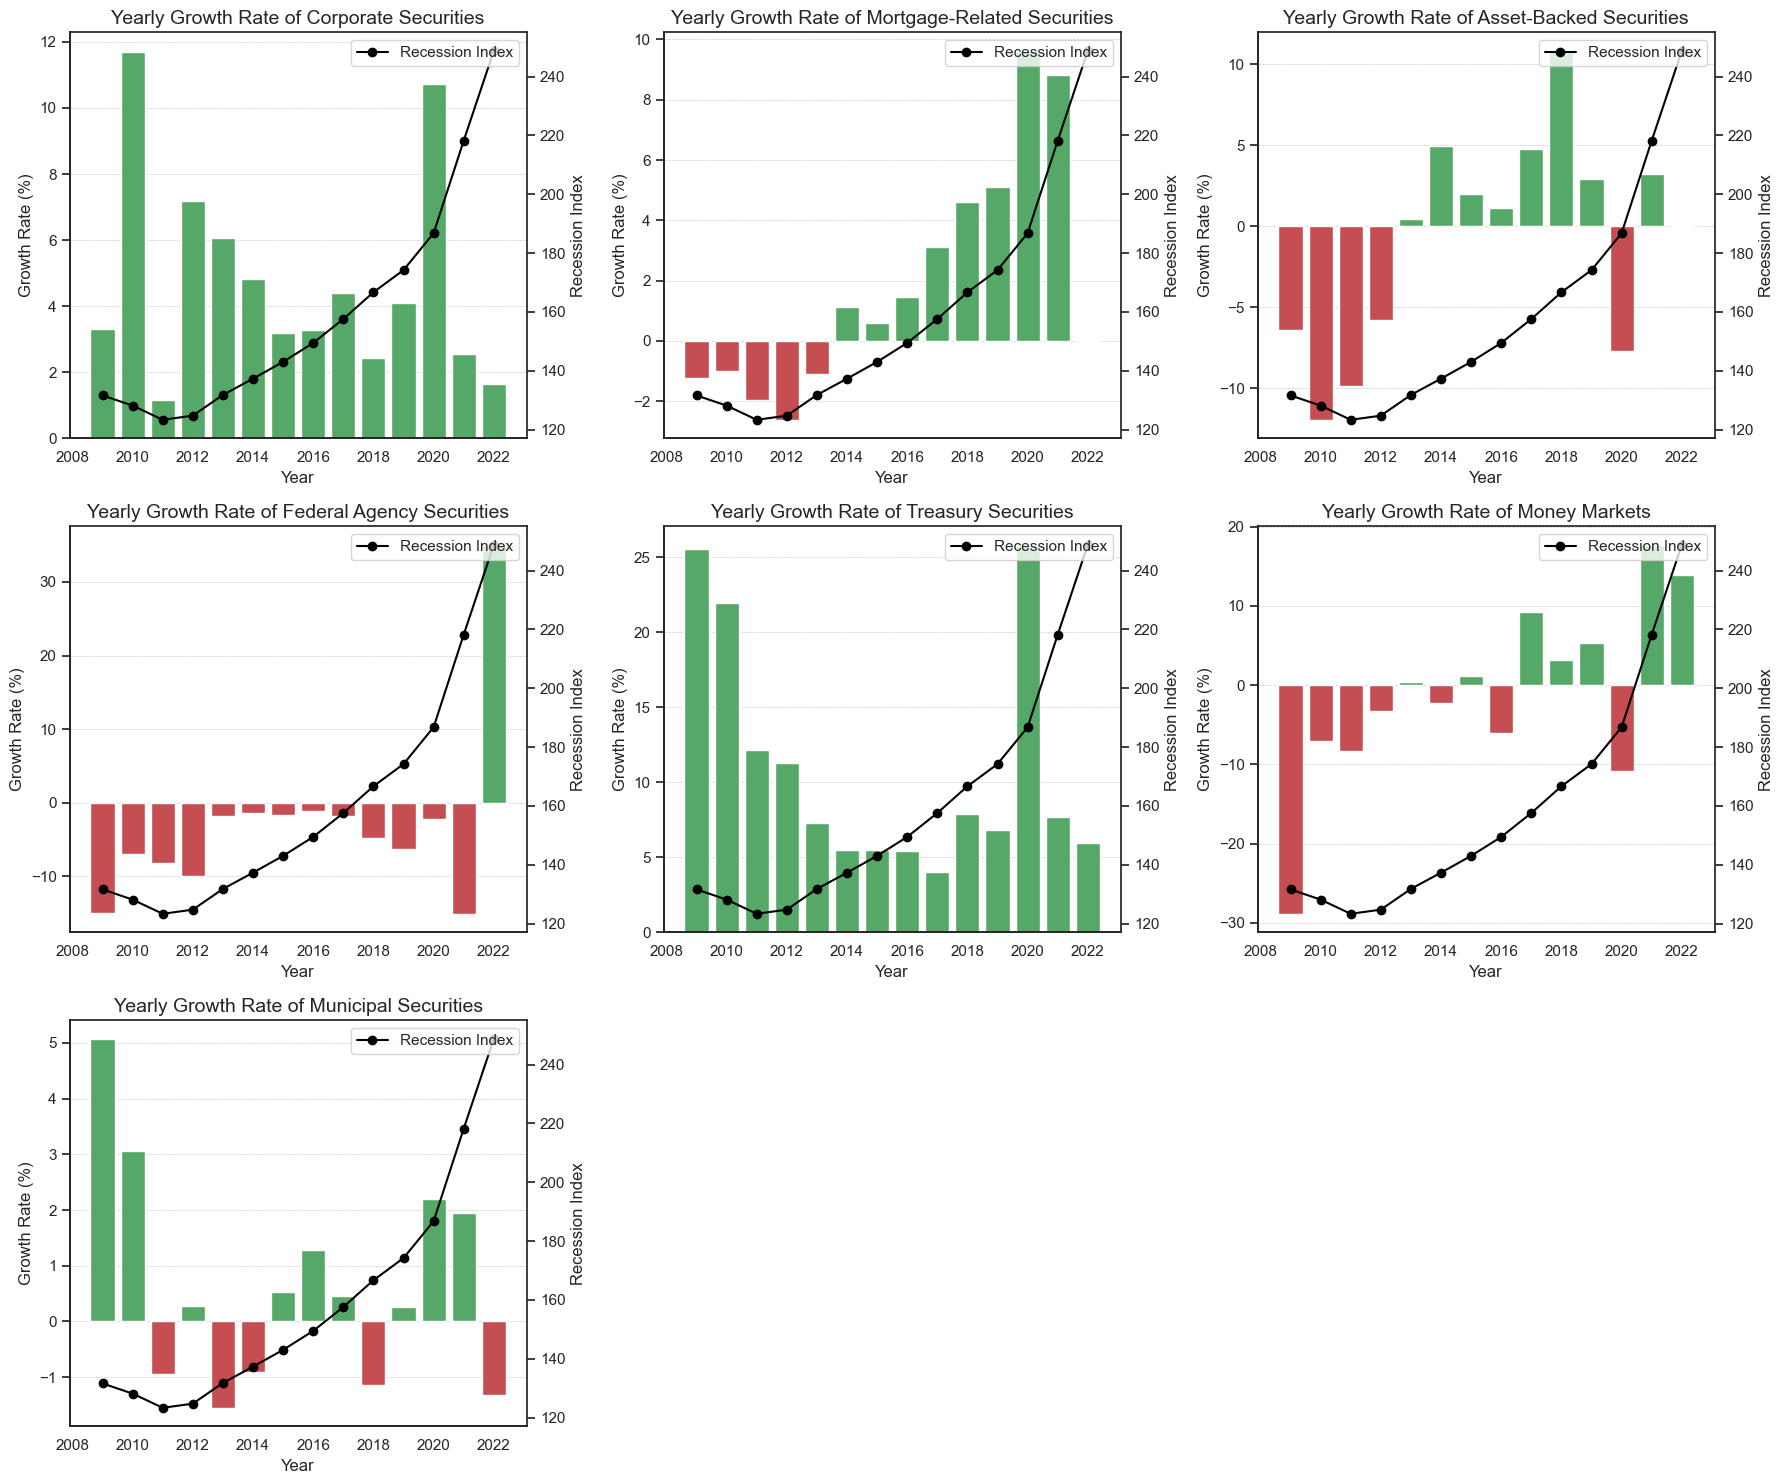

In [49]:
# Filter dataframes for years after 2008
df_growth_rates = df_growth_rates[df_growth_rates.index > 2008]
merged_df_house = merged_df_house[merged_df_house['period'] > 2008]

# Set the figure size
plt.figure(figsize=(18, 15))

# Plot each bond type as a separate subplot
for i, col in enumerate(columns):
    ax1 = plt.subplot(3, 3, i+1)
    
    # Bar plot for growth rate with color based on the value
    colors = ['g' if val > 0 else 'r' for val in df_growth_rates[col]]
    ax1.bar(df_growth_rates.index, df_growth_rates[col], color=colors)
    
    # Add recession index as a line plot on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(merged_df_house['period'], merged_df_house['Index_SA'], 'o-', color='black', label='Recession Index')
    
    # Set title, labels, and legends
    ax1.set_title(f'Yearly Growth Rate of {col}', fontsize=14)
    ax1.set_ylabel('Growth Rate (%)')
    ax1.set_xlabel('Year')
    ax2.set_ylabel('Recession Index')
    ax2.legend(loc='upper right')
    
    # Grid lines for better clarity
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


In [50]:
# Filter merged_df_house for years after 2008
merged_df_house = merged_df_house[merged_df_house['period'] > 2008]

pearson_correlations = []
spearman_correlations = []
kendall_correlations = []

# Loop through each bond type
for col in columns:
    pearson_corr = merged_df_house[col].corr(merged_df_house['Index_SA'], method='pearson')
    spearman_corr = merged_df_house[col].corr(merged_df_house['Index_SA'], method='spearman')
    kendall_corr = merged_df_house[col].corr(merged_df_house['Index_SA'], method='kendall')
    
    pearson_correlations.append(pearson_corr)
    spearman_correlations.append(spearman_corr)
    kendall_correlations.append(kendall_corr)

# Create a dataframe to display results
results_df = pd.DataFrame({
    'Bond Type': columns,
    'Pearson Correlation': pearson_correlations,
    'Spearman Rank Correlation': spearman_correlations,
    'Kendall Tau Correlation': kendall_correlations
})

display(results_df)


,Bond Type,Pearson Correlation,Spearman Rank Correlation,Kendall Tau Correlation
0,Corporate Securities,-0.256252,-0.261538,-0.252747
1,Mortgage-Related Securities,0.587909,0.815385,0.714286
2,Asset-Backed Securities,0.323231,0.459341,0.340659
3,Federal Agency Securities,0.587439,0.309890,0.186813
4,Treasury Securities,-0.196909,-0.283516,-0.208791
5,Money Markets,0.633997,0.639560,0.516484
6,Municipal Securities,-0.121787,-0.059341,-0.010989
